# 1. Introduction

**Title** <br>Predicting Movie Success <br><br>
**Participants** <br>Aleksandra Adamczak, and Saran Singh <br><br>

**Overview** <br>
With this assignment, our goal is to develop a machine learning model to predict movie revenue based on key features.

We aim to predict a movie's financial success, which is crucial for production and marketing decisions.
<br>
Many factors affect the success of a movie, and this project aims to explore and identify those key factors.

# 2. Data Exploration

We have two different data sources, both from Kaggle. 
- **Primary Data Source**: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data
- **Additional Data Source**: https://www.kaggle.com/datasets/phiitm/late-night-talk-show-youtube-dataset
---

<h4 style="margin-bottom: 0;">Primary Data Source:</h4>
This dataset contains a collection of 1,000,000 movies from the TMDB database.

We will use the following CSV files as our primary data sources:
1. `tmdb_5000_credits.csv`: Contains information about the cast and crew of each movie.  
2. `tmdb_5000_movies.csv`: Contains information about the movies.  
---

<h4 style="margin-bottom: 0;">Additional Data Source:</h4>
Both <b>Youtube</b>, and <b>Late Night Talk Shows</b> are very popular, we will use YouTube data from the Talk Shows to explore specific hypotheses, like does late-night promotions impact metrics like opening weekend revenue, etc.

We have data from the following six talk shows:
- Conan
- James Corden  
- Jimmy Fallon  
- Jimmy Kimmel  
- Seth Meyers  
- Stephen Colbert

---


### 2.1 Understand - Primary Dataset

In [855]:
import pandas as pd
credits_df = pd.read_csv('Data- movies/Movies/tmdb_5000_credits.csv')
movies_df = pd.read_csv('Data- movies/Movies/tmdb_5000_movies.csv')

# Data structure overview
print(movies_df.info())
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Key Observations:
<br>
We have two datasets:
<br>
- Dataset 1: `movies_df`
    - This dataset seems to contain attributes related to movies.
    - **Shape**: 4,803 rows and 20 columns.
    - **Columns**: We have a mix of numerical like `budget`, `revenue`, `runtime` and categorical values like `genres`, `original_language`.
<br>
<br>
- Dataset 2: `credits_df`
    - This dataset contains cast, and crew information.
    - **Shape**: 4,803 rows and 4 columns.
    - **Columns**: `movie_id`, `title`, `cast`, and `crew`. `movie_id` contains numerical values, and rest cateogrical. 
<br>
- Both datasets seem to be connected via shared key which is <b> id </b> in `movies_df` and <b> movie_id </b> in `credits_df`, we will explore this further as this will help merge data easier.


### 2.2 Potential target variables 

In [856]:
print("Potential target variables:\n", movies_df[['revenue', 'vote_count', 'popularity', 'budget']].head())

Potential target variables:
       revenue  vote_count  popularity     budget
0  2787965087       11800  150.437577  237000000
1   961000000        4500  139.082615  300000000
2   880674609        4466  107.376788  245000000
3  1084939099        9106  112.312950  250000000
4   284139100        2124   43.926995  260000000


### 2.3 Missing values

In [857]:
movies_missing_values = movies_df.isnull().sum()
credits_missing_values = credits_df.isnull().sum()


movies_missing_values = movies_missing_values[movies_missing_values > 0]
credits_missing_values = credits_missing_values[credits_missing_values > 0]

print("Movies- Columns with missing values:")
print(movies_missing_values)

print("Crew- Columns with missing values:")
print(credits_missing_values)


Movies- Columns with missing values:
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64
Crew- Columns with missing values:
Series([], dtype: int64)


### 2.4 Zero values

In [858]:
zero_values_movies = {}

for column in movies_df.columns:
    zero_count = (movies_df[column] == 0).sum()
    zero_values_movies[column] = zero_count

zero_values_movies = {key: value for key, value in zero_values_movies.items() if value > 0}

print("Columns with zero values - Movies:")
print(zero_values_movies)

# Let's do it for credits as well
zero_values_credits = {}

for column in credits_df.columns:
    zero_count = (credits_df[column] == 0).sum()
    zero_values_credits[column] = zero_count

zero_values_credits = {key: value for key, value in zero_values_credits.items() if value > 0}

print("\nColumns with zero values - Credits:")
print(zero_values_credits)

Columns with zero values - Movies:
{'budget': np.int64(1037), 'popularity': np.int64(1), 'revenue': np.int64(1427), 'runtime': np.int64(35), 'vote_average': np.int64(63), 'vote_count': np.int64(62)}

Columns with zero values - Credits:
{}


Observation:

We have a significant amount of zero values and missing values in the movies dataframe, while the credits dataframe does not contain any missing or zero values. However, given the large dataset available, we still have a very good amount of usable data.
We will further investigate these columns to decide on an action plan for handling them

### 2.5 Combine Datasets

We currently have two datasets in our Primary dataset: one containing movie details and the other with cast and crew information.

We also have another 5 data sources as our additonal datasets which are related to the talk shows.

Our goal is to merge these datasets into a single dataframe by extracting valuable insights. We will do it now since the next step is Splitting the data for test/train.

We will first explore this dataset to understand its structure and contents, then decide what specific information to extract and combine with the movie dataset.

We will start with the `credits_df`

In [859]:
# Preview the credits dataset
print("First 5 rows of credits dataset:")
print(credits_df) 

First 5 rows of credits dataset:
      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                                                                                                                                                                                                                      

Obervations:
- `movie_id`:
    - This will be useful for merging with the main movies dataset.
- `title`:
    - We could also use the title for merging, but its more reliable to use the  id.
- `cast`: Contains JSON-like strings detailing the cast members.

Lets expand the cast column to visualize the data better and understand it.

In [860]:
# View a single row's JSON content
import json

json_data = credits_df['cast'].iloc[0]  # First row
print(json.dumps(json_data, indent=4))  # Pretty-print JSON

"[{\"cast_id\": 242, \"character\": \"Jake Sully\", \"credit_id\": \"5602a8a7c3a3685532001c9a\", \"gender\": 2, \"id\": 65731, \"name\": \"Sam Worthington\", \"order\": 0}, {\"cast_id\": 3, \"character\": \"Neytiri\", \"credit_id\": \"52fe48009251416c750ac9cb\", \"gender\": 1, \"id\": 8691, \"name\": \"Zoe Saldana\", \"order\": 1}, {\"cast_id\": 25, \"character\": \"Dr. Grace Augustine\", \"credit_id\": \"52fe48009251416c750aca39\", \"gender\": 1, \"id\": 10205, \"name\": \"Sigourney Weaver\", \"order\": 2}, {\"cast_id\": 4, \"character\": \"Col. Quaritch\", \"credit_id\": \"52fe48009251416c750ac9cf\", \"gender\": 2, \"id\": 32747, \"name\": \"Stephen Lang\", \"order\": 3}, {\"cast_id\": 5, \"character\": \"Trudy Chacon\", \"credit_id\": \"52fe48009251416c750ac9d3\", \"gender\": 1, \"id\": 17647, \"name\": \"Michelle Rodriguez\", \"order\": 4}, {\"cast_id\": 8, \"character\": \"Selfridge\", \"credit_id\": \"52fe48009251416c750ac9e1\", \"gender\": 2, \"id\": 1771, \"name\": \"Giovanni R

Observation:
<br>
The JSON data above contains a list of cast members, with following details:
<br>
`cast_id:` A unique identifier for the cast memebers.
<br>
`character:` The character name played by the actor in the movie.
<br>
`credit_id:` A unique identifier for the credit record.
<br>
`gender:` Represents the gender of the actor (1 = female, 2 = male, 0 = unspecified/unknown).
<br>
`id:` A unique ID for the actor.
<br>
`name:` The name of the actor.
<br>
`order:` The billing order of the actor in the movie credits.


We have decided to extract following for each movie:
<br>
- Crew information:
    - Director's name.
    - Writers' names.
    - Producers' names.
    - Total crew size.
<br>
- Main actors:
    - Names of up to 10 main actors.
    - Genders of those actors.

In [861]:
# Extraction of Main Actors data
import ast

def extract_main_actors(cast_column, max_actors=10):
    """
    Extracts the names and genders of the main actors from the cast column.
    """
    actor_names = []
    actor_genders = []
    
    for entry in cast_column:
        try:
            cast_data = ast.literal_eval(entry)
            cast_data = sorted(cast_data, key=lambda x: x.get('order', float('inf')))
            
            # Extract actor names and genders
            names = [cast_data[i].get('name', None) for i in range(min(len(cast_data), max_actors))]
            genders = [cast_data[i].get('gender', None) for i in range(min(len(cast_data), max_actors))]
            
            # Pad with None if fewer than max_actors
            while len(names) < max_actors:
                names.append(None)
                genders.append(None)
        except (ValueError, SyntaxError):
            # Handle invalid JSON-like strings
            names = [None] * max_actors
            genders = [None] * max_actors
        
        actor_names.append(names)
        actor_genders.append(genders)
    
    return actor_names, actor_genders

# Apply the function to the `credits_df`
actor_names, actor_genders = extract_main_actors(credits_df['cast'], max_actors=10)

# Add the results as separate columns
credits_df['main_actor_names'] = actor_names
credits_df['main_actor_genders'] = actor_genders

# Verify results
print(credits_df[['movie_id', 'main_actor_names', 'main_actor_genders']].head())


   movie_id  \
0     19995   
1       285   
2    206647   
3     49026   
4     49529   

                                                                                                                                              main_actor_names  \
0    [Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso]   
1      [Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoffrey Rush, Jack Davenport, Kevin McNally, Tom Hollander]   
2          [Daniel Craig, Christoph Waltz, Léa Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie Harris, Dave Bautista, Andrew Scott, Rory Kinnear]   
3  [Christian Bale, Michael Caine, Gary Oldman, Anne Hathaway, Tom Hardy, Marion Cotillard, Joseph Gordon-Levitt, Morgan Freeman, Cillian Murphy, Juno Temple]   
4    [Taylor Kitsch, Lynn Collins, Samantha Morton, Willem Dafoe, Thomas Haden Church, Mark Strong,

In [862]:
# Extraction of crew data

import ast

def extract_crew_info(crew_list, job_title):
    """Extract crew member names based on their job title."""
    try:
        crew = ast.literal_eval(crew_list)
        return [member['name'] for member in crew if member['job'] == job_title]
    except (ValueError, SyntaxError):
        return []

def calculate_crew_size(crew_list):
    """Calculate the total number of crew members."""
    try:
        crew = ast.literal_eval(crew_list)
        return len(crew)
    except (ValueError, SyntaxError):
        return 0

# Extract Directors
credits_df['directors'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Director'))

# Extract Writers
credits_df['writers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Writer'))

# Extract Producers
credits_df['producers'] = credits_df['crew'].apply(lambda x: extract_crew_info(x, 'Producer'))

# Calculate Crew Size
credits_df['crew_size'] = credits_df['crew'].apply(calculate_crew_size)

# Display the first few rows of the new columns
print(credits_df[['movie_id', 'directors', 'writers', 'producers', 'crew_size']].head())



   movie_id            directors          writers  \
0     19995      [James Cameron]  [James Cameron]   
1       285     [Gore Verbinski]               []   
2    206647         [Sam Mendes]               []   
3     49026  [Christopher Nolan]               []   
4     49529     [Andrew Stanton]               []   

                                                               producers  \
0                                            [James Cameron, Jon Landau]   
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]   
2                                  [Barbara Broccoli, Michael G. Wilson]   
3                        [Charles Roven, Christopher Nolan, Emma Thomas]   
4                            [Colin Wilson, Jim Morris, Lindsey Collins]   

   crew_size  
0        153  
1         32  
2        155  
3        217  
4        132  


Obeservation:
<br>
We notice that most movies have a single director, as expected. We also notice that the writers column is empty for some rows, which might indicate missing data, if it is indeed empty, we can tag it unknown.
Crew size vary significantly, reflecting the scale of production for each movie, this column helps provide a peak into the resourcess allocated for each movie which we would explore further.
<br>
<br>
Since some of the writers rows were empty. Lets first check for empty values in the extracted columns.

In [863]:
# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")


main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 30 missing rows
writers: 3252 missing rows
producers: 1023 missing rows


Observations:
<br>
We do have some significat missing data.

- For features like writers, directors, and producers, we will be replacing missing values with placeholders  "Unknown".

Let's proceed with replacing the missing values.

In [864]:
# Replace missing values in the specified columns with "Unknown"
columns_to_replace = ['writers', 'directors', 'producers']

for column in columns_to_replace:
    credits_df[column] = credits_df[column].apply(lambda x: x if len(x) > 0 else ["Unknown"])

# Verify the changes
print("Updated 'writers', 'directors', and 'producers' columns:")
print(credits_df[['writers', 'directors', 'producers']].head())


Updated 'writers', 'directors', and 'producers' columns:
           writers            directors  \
0  [James Cameron]      [James Cameron]   
1        [Unknown]     [Gore Verbinski]   
2        [Unknown]         [Sam Mendes]   
3        [Unknown]  [Christopher Nolan]   
4        [Unknown]     [Andrew Stanton]   

                                                               producers  
0                                            [James Cameron, Jon Landau]  
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]  
2                                  [Barbara Broccoli, Michael G. Wilson]  
3                        [Charles Roven, Christopher Nolan, Emma Thomas]  
4                            [Colin Wilson, Jim Morris, Lindsey Collins]  


In [865]:
#  Lets confirm that it worked.

# Columns to check for missing or empty data
columns_to_check = ['main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers']

# Function to count missing or empty values
def count_missing_or_empty(column):
    return credits_df[column].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isnull(x)).sum()

# Check all specified columns
missing_data_summary = {col: count_missing_or_empty(col) for col in columns_to_check}

# Display the results
for column, count in missing_data_summary.items():
    print(f"{column}: {count} missing rows")

# Count how many unknowns are there- just to sure that it matches the missing values we had before.
unknown_directors = credits_df['directors'].apply(lambda x: 'Unknown' in x).sum()
unknown_writers = credits_df['writers'].apply(lambda x: 'Unknown' in x).sum()
unknown_producers = credits_df['producers'].apply(lambda x: 'Unknown' in x).sum()
print(f"Unknown directors: {unknown_directors}")
print(f"Unknown writers: {unknown_writers}")
print(f"Unknown producers: {unknown_producers}")

main_actor_names: 0 missing rows
main_actor_genders: 0 missing rows
directors: 0 missing rows
writers: 0 missing rows
producers: 0 missing rows
Unknown directors: 30
Unknown writers: 3252
Unknown producers: 1023


Lets proceed with merging the datasets.  
We need to ensure that we only merge the movies that are currently present in out movies dataframe since some of the rows were removed.

In [866]:
# Merge the movies_df with the processed credits_df
movies_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner')

# Verify the results of the merge
print("Merged DataFrame shape:", movies_df.shape)
print("Merged DataFrame preview:")
print(movies_df.head())

# Check for any movies in movies_df that did not have matching records in credits_df
unmatched_movies = movies_df[~movies_df['id'].isin(credits_df['movie_id'])]
print(f"\nNumber of unmatched movies: {unmatched_movies.shape[0]}")

Merged DataFrame shape: (4803, 30)
Merged DataFrame preview:
      budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]   
3                [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]   
4                                 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]

Now lets look at the talk shows dataset.

We will begin with `Conan`.

In [867]:
conan_df = pd.read_csv('Data- movies/Talk_Show/Conan.csv')

# print a few rows for each column
print(conan_df.head())

     publishedAtSQL  \
0  12-06-2020 12:00   
1  11-06-2020 23:34   
2  11-06-2020 23:32   
3  11-06-2020 00:00   
4  10-06-2020 21:03   

                                                                      videoTitle  \
0         Deon Cole On White Protester Signs That Missed The Mark - CONAN on TBS   
1                            Nicole Byer On Finding Humor In Pain - CONAN on TBS   
2                 Sona Crashes Conan's Interview With Nicole Byer - CONAN on TBS   
3      Senator Cory Booker On This Crossroads In American History - CONAN on TBS   
4  Senator Cory Booker Wants This To Be A Moral Moment In America - CONAN on TBS   

                                                                                                                                                                                                                                                                                                                                                                    

The data here seems fairly new. Let's find the oldest record in the dataset to determine if we can match it with movies in our existing dataset released during the same period. If not, it may not be as useful and could introduce bias.

In [868]:
# Convert 'publishedAtSQL' to datetime format with dayfirst=True
try:
    conan_df['publishedAtSQL'] = pd.to_datetime(conan_df['publishedAtSQL'], dayfirst=True)
except Exception as e:
    raise

# Display the first 5 records of the 'publishedAtSQL' column sorted by earliest date for Conan dataset
sorted_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head()
print ("\nEarliest published dates in Conan dataset:")
print(sorted_published_dates)

# Sort by 'publishedAtSQL' in descending order and display the first 5 rows
newest_published_dates = conan_df.sort_values(by='publishedAtSQL', ascending=False)[['publishedAtSQL']].head()
print("\nNewest published dates in Conan dataset:")
print(newest_published_dates)

# Display the first 5 records of the 'release_date' column sorted by earliest date for Movies dataset
sorted_release_dates1 = movies_df.sort_values(by='release_date', ascending=True)['release_date'].head()
print("\nEarliest release dates in movies dataset:")
print(sorted_release_dates1)

# Sort by 'release_date' in descending order and display the first 5 rows
newest_release_dates = movies_df.sort_values(by='release_date', ascending=False)[['release_date']].head()
print("\nNewest release dates in movies dataset:")
print(newest_release_dates)


Earliest published dates in Conan dataset:
8724   2010-08-19 15:57:00
8723   2010-08-23 22:34:00
8722   2010-08-25 23:06:00
8721   2010-08-26 00:21:00
8720   2010-08-27 00:47:00
Name: publishedAtSQL, dtype: datetime64[ns]

Newest published dates in Conan dataset:
       publishedAtSQL
0 2020-06-12 12:00:00
1 2020-06-11 23:34:00
2 2020-06-11 23:32:00
3 2020-06-11 00:00:00
4 2020-06-10 21:03:00

Earliest release dates in movies dataset:
4592    1916-09-04
4661    1925-11-05
2638    1927-01-10
4457    1929-01-30
4594    1929-02-08
Name: release_date, dtype: object

Newest release dates in movies dataset:
     release_date
4255   2017-02-03
3408   2016-10-02
3302   2016-09-16
4720   2016-09-09
3249   2016-09-09


Our movie data is much older, and its not very new as compared to the talk show. Lets look at other talk shows.

In [869]:
# List of files and dataframes
file_names = [
    'Data- movies/Talk_Show/James_Corden.csv',
    'Data- movies/Talk_Show/Jimmy_Fallon.csv',
    'Data- movies/Talk_Show/Jimmy_Kimmel.csv',
    'Data- movies/Talk_Show/Seth_Meyers.csv',
    'Data- movies/Talk_Show/Stephen_Colbert.csv'
]

dataframes = {}

# Load and process each dataframe
for file_name in file_names:
    df_name = file_name.split('/')[-1].split('.')[0]
    dataframes[df_name] = pd.read_csv(file_name)
    try:
        # Convert 'publishedAtSQL' to datetime
        dataframes[df_name]['publishedAtSQL'] = pd.to_datetime(
            dataframes[df_name]['publishedAtSQL'], dayfirst=True, errors='coerce'
        )
    except Exception as e:
        print(f"Error processing {df_name}: {e}")
        continue
    
    # Display the earliest 5 dates for each dataset
    print(f"\nEarliest 5 records for {df_name}:")
    print(dataframes[df_name].sort_values(by='publishedAtSQL', ascending=True)['publishedAtSQL'].head())


Earliest 5 records for James_Corden:
4138   2015-02-07 22:30:00
4137   2015-02-09 03:48:00
4136   2015-03-10 14:00:00
4135   2015-03-16 19:11:00
4134   2015-03-17 22:25:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Fallon:
5979   2012-04-13 04:34:00
5978   2012-04-25 02:19:00
5977   2012-04-25 03:14:00
5976   2012-04-25 05:21:00
5975   2012-05-25 04:35:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Jimmy_Kimmel:
4733   2009-01-16 14:30:00
4732   2009-01-16 14:37:00
4731   2009-06-04 07:16:00
4730   2009-08-27 22:48:00
4728   2009-10-02 05:57:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Seth_Meyers:
3337   2014-02-21 23:30:00
3336   2014-02-21 23:36:00
3335   2014-02-26 05:31:00
3334   2014-02-28 05:27:00
3333   2014-03-01 06:34:00
Name: publishedAtSQL, dtype: datetime64[ns]

Earliest 5 records for Stephen_Colbert:
6754   2015-06-03 17:00:00
6753   2015-06-04 17:36:00
6752   2015-06-08 21:05:00
6751   2015

Overvations: 
- The talk show data is significantly newer compared to the movies dataset, which spans over a century. This mismatch would make it challenging to draw meaningful insights
- Using the talk show data could introduce signification bias because only modern movies will likely be represented. This would lead to concludions that do not generalize well.


The talk show data comes from a different source than the movies dataset. That is reason for this mismatch, it could introduce errors, misinterpretations.
<br>
We have decided not to use the talk show data and set our sole target variable as the `revenue`.

# 3. Data Cleaning

### 3.1 Handle Missing data and Zero values  <h5>[Link to analysis](#analysis1)</h5>  <a id="#analysis2"></a>

- Budget and Revenue:
    - We have signification amount of zero values for both (1037 for budget, 1427 for revenue). For our model, these two are very important features: <br> Since we are working with a very large amount of dataset which contains 4803 rows, we have decided that we <b>drop</b> these rows that contain missing information as replacing these with placehodler values would create bias, and provide little to no value. <br>

- Homepage: Contains 3091 missing values, this column does not provide any value. We have decided to drop it this column.

- release_date, popularity, and runtime: These columns contain a few missing values/zeros we will drop these rows it will have very minimal impact.

- Both vote_average and vote count have zero values 
    - A zero value likely indicates that no meaningful votes were recorded for the movie. We are leaving them as-is as they don't form a large portion of the dataset.
    - It might have been also okay to drop both vote_average, vote_count since we don't know the source of these votes. But we have decided to keep it for now
     
- Tagline contains 844 missing values. Let's understand what it represents first
- Lets also understand what overview contains as it contains missing values

In [870]:
# Pring first 5 rows of tagline
print(movies_df['tagline'].head())

# Print first 5 rows of overview
print(movies_df['overview'].head())

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object
0                                                                                                                                                                                                                                                                 In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
1                                                                                                                                                                                                                                                                Captain Barbossa, lo

- We have decided to drop tagline and overview column as well, as it will have no impact in our analysis.

In [871]:
# Drop irrelevant columns 
columns_to_drop = ['homepage', 'tagline', 'overview']
movies_df = movies_df.drop(columns=columns_to_drop)
movies_df.head()

budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]   
3                [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]   
4                                 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]   

       id  \
0   19995   
1     285   
2  206647   
3   49026   
4   49529   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      keywords  \
0                              [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                                               [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}

`Status column` likely contains information about the movie's current status like released, in-production, etc.

Plan:
- Inspect the Values:
    - Check the unique values in the column.

- Analyze Distribution:
    - Determine how many movies fall into each status category. 

In [872]:
# Check the unique values in the 'status' column
unique_status = movies_df['status'].unique()
print("Unique values in 'status':", unique_status)

# Analyze the distribution of values in the 'status' column
status_distribution = movies_df['status'].value_counts()
print("\nDistribution of 'status':")
print(status_distribution)

# Check for missing values
missing_status = movies_df['status'].isnull().sum()
print("\nMissing values in 'status':", missing_status)


Unique values in 'status': ['Released' 'Post Production' 'Rumored']

Distribution of 'status':
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

Missing values in 'status': 0


Oberservation:
- 99.5% of the dataset is marked released which is great because we want to only include the released movies.
- Only 1 movie is marked as Post Production, which does not provide meaningful information for predicting revenue.
- No missing values

Plan:
- The status column is not useful for modeling and can safely be dropped.
- We also have one row with a movie which is marked under Post Production. Lets remove it since we only need Released movies.

In [873]:
# Remove rows where 'status' is not 'Released'
movies_df = movies_df[movies_df['status'] == 'Released']

In [874]:
# Let's drop the 'status' column
movies_df = movies_df.drop(columns=['status'])


# Verify the results
print("Columns after dropping 'status':")
print(movies_df.columns)

print("\nRemaining rows after cleanup:",movies_df.shape[0])

Columns after dropping 'status':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title_x', 'vote_average', 'vote_count', 'movie_id',
       'title_y', 'cast', 'crew', 'main_actor_names', 'main_actor_genders',
       'directors', 'writers', 'producers', 'crew_size'],
      dtype='object')

Remaining rows after cleanup: 4795


In [875]:
# Drop rows with zero or missing values in important columns
columns_to_check = ['budget', 'revenue', 'release_date', 'popularity', 'runtime']
cleaned_movies_df = movies_df.copy()
for col in columns_to_check:
    if col in ['budget', 'revenue']:
        cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]
    else:
        cleaned_movies_df = cleaned_movies_df.dropna(subset=[col])
        if cleaned_movies_df[col].dtype in ['int64', 'float64']:
            cleaned_movies_df = cleaned_movies_df[cleaned_movies_df[col] != 0]

print("Remaining rows in cleaned df:", cleaned_movies_df.shape[0])

Remaining rows in cleaned df: 3228


### 3.3 Outlier analysis

#### Budget

Summary statistics for 'budget':
count    3.228000e+03
mean     4.066642e+07
std      4.439840e+07
min      1.000000e+00
25%      1.050000e+07
50%      2.500000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


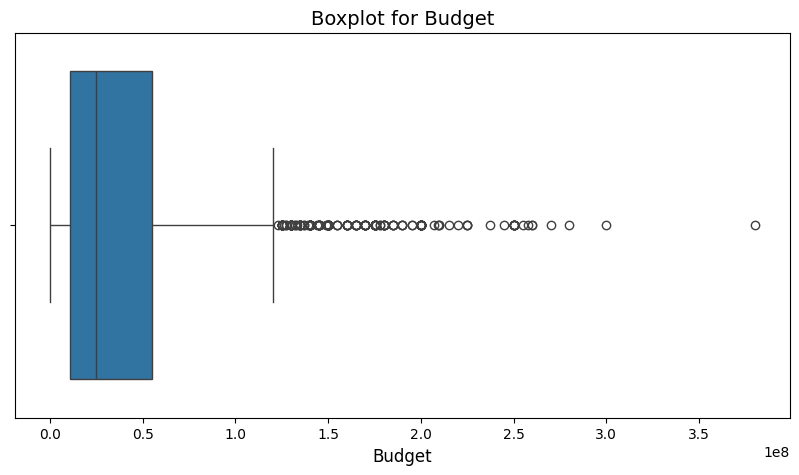

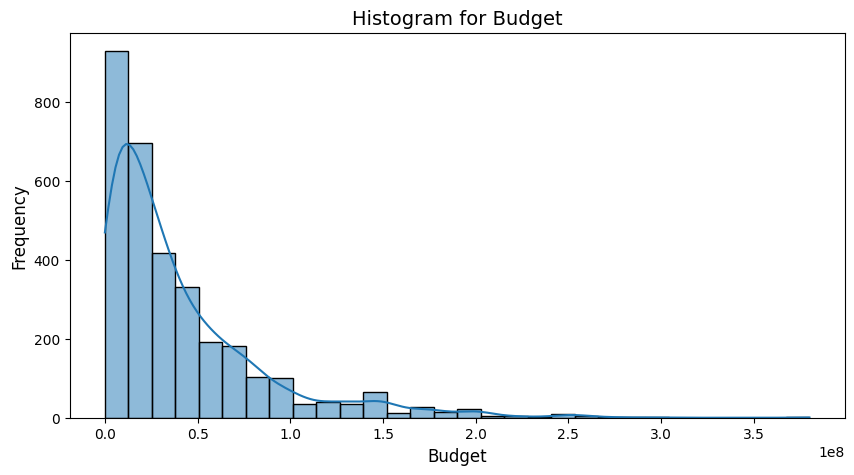

Lower bound for outliers: -56250000.0
Upper bound for outliers: 121750000.0
Number of outliers in 'budget': 216
Examples of outliers:
                                    title_y     budget
0                                    Avatar  237000000
1  Pirates of the Caribbean: At World's End  300000000
2                                   Spectre  245000000
3                     The Dark Knight Rises  250000000
4                               John Carter  260000000


In [876]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics for 'budget':")
print(cleaned_movies_df['budget'].describe())

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=cleaned_movies_df['budget'])
plt.title('Boxplot for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_movies_df['budget'], bins=30, kde=True)
plt.title('Histogram for Budget', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Identify potential outliers []
q1 = cleaned_movies_df['budget'].quantile(0.25)
q3 = cleaned_movies_df['budget'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Q1 (25th percentile): The value below which 25% of the data lies.
# Q3 (75th percentile): The value below which 75% of the data lies.
# IQR = Q3 - Q1.    

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

outliers = cleaned_movies_df[(cleaned_movies_df['budget'] < lower_bound) | (cleaned_movies_df['budget'] > upper_bound)]
print(f"Number of outliers in 'budget': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'budget']].head())


Observation from the Boxplot:
- The upper threshold for outliers is 120 million (120,000,000).
- Any movie with a budget above this is considered an outlier.
- There are 216 outliers (movies with extremely high budgets) in our dataset which makes sense.

Observations from the Histrogram:
- The histogram shows a long tail on the right side, meaning there are a few movies with extremely high budgets.
- Most of the budget values are concentrated on the left (lower budgets), while only a small number of movies have very high budgets (outliers).
- y-axis in the histogram represent number of movies, and x-axis the budget.
- x-axis in the histogram is scaled in scientific notation because the budget values are very large.

Summary:
Given that Budget will be one of the most important features for our model training, removing or transforming these budget outliers could erase valuable insights how these big-budget movies like avatar impact
revenue. A log transformation would reduce the budget values, which might supress meaningful variations between small, mid-range, and high-budget movies. We will keep these outlier, and train our model to learn from this instead of discarding it.


#### Revenue

Summary statistics for 'revenue':
count    3.228000e+03
mean     1.212803e+08
std      1.863197e+08
min      5.000000e+00
25%      1.700000e+07
50%      5.519150e+07
75%      1.463434e+08
max      2.787965e+09
Name: revenue, dtype: float64


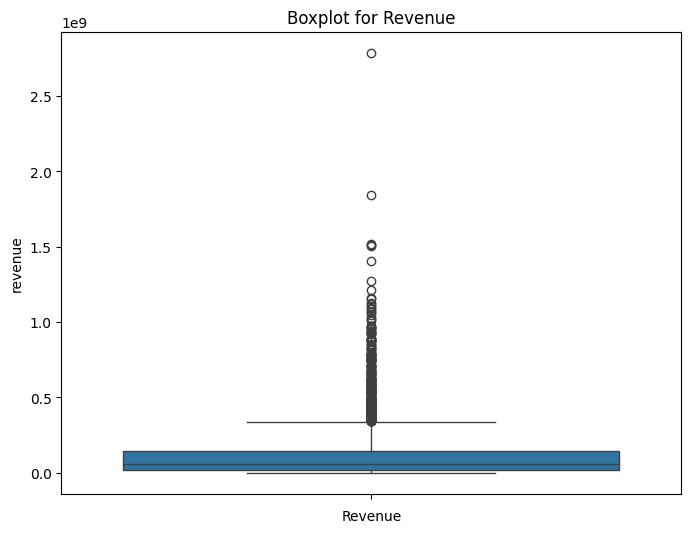

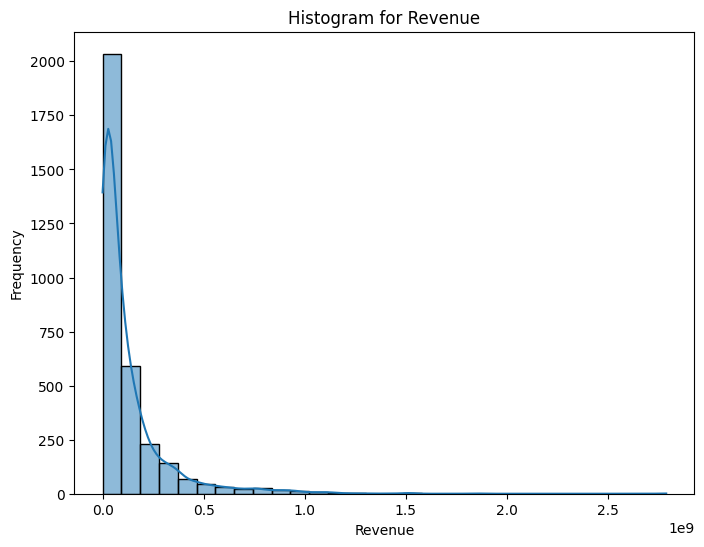


Lower bound for outliers: -177015174.25
Upper bound for outliers: 340358623.75
Number of outliers in 'revenue': 285

Examples of outliers:
                                    title_y     revenue
0                                    Avatar  2787965087
1  Pirates of the Caribbean: At World's End   961000000
2                                   Spectre   880674609
3                     The Dark Knight Rises  1084939099
5                              Spider-Man 3   890871626


In [877]:
# Step 1: Summary Statistics for Revenue
revenue_summary = cleaned_movies_df['revenue'].describe()
print("Summary statistics for 'revenue':")
print(revenue_summary)

# Step 2: Boxplot to Visualize Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(cleaned_movies_df['revenue'])
plt.title("Boxplot for Revenue")
plt.xlabel("Revenue")
plt.show()

# Step 3: Histogram to Visualize Distribution
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['revenue'], kde=True, bins=30)
plt.title("Histogram for Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Step 4: Identify Outliers using IQR
q1_revenue = cleaned_movies_df['revenue'].quantile(0.25)
q3_revenue = cleaned_movies_df['revenue'].quantile(0.75)
iqr_revenue = q3_revenue - q1_revenue

lower_bound = q1_revenue - 1.5 * iqr_revenue
upper_bound = q3_revenue + 1.5 * iqr_revenue

outliers_revenue = cleaned_movies_df[(cleaned_movies_df['revenue'] < lower_bound) | 
                                     (cleaned_movies_df['revenue'] > upper_bound)]

print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'revenue': {len(outliers_revenue)}")

# Step 5: Examples of Outliers
print("\nExamples of outliers:")
print(outliers_revenue[['title_y', 'revenue']].head())


Summary:
<br>
The boxplot and histogram for revenue show a heavily right-skewed distribution with numerous outliers on the higher end. These outliers represent blockbuster movies like Avatar, which have exceptionally high revenues similar to what we saw with Budget.
<br>
- Skewness:
    - The revenue data is positively skewed, as the majority of movies have relatively low revenue, and only a few movies have extremely high revenue.
<br>
- Outliers:
<br>
    - A significant number of outliers appear above the upper whisker in the boxplot.
    - These outliers are movies with extraordinarily high revenues, representing major hits.

Similar to the budget column, outliers in revenue represent critical data points since they indicate blockbuster hits. Removing these outliers might distort the analysis because:
Since our goal is to predict revenue, so high-value outliers provide essential insights into what makes movies financially successful. We will keep these outliers as well.


#### Popularity

Summary statistics for 'popularity':
count    3228.000000
mean       29.042156
std        36.168131
min         0.019984
25%        10.468206
50%        20.412963
75%        37.340747
max       875.581305
Name: popularity, dtype: float64


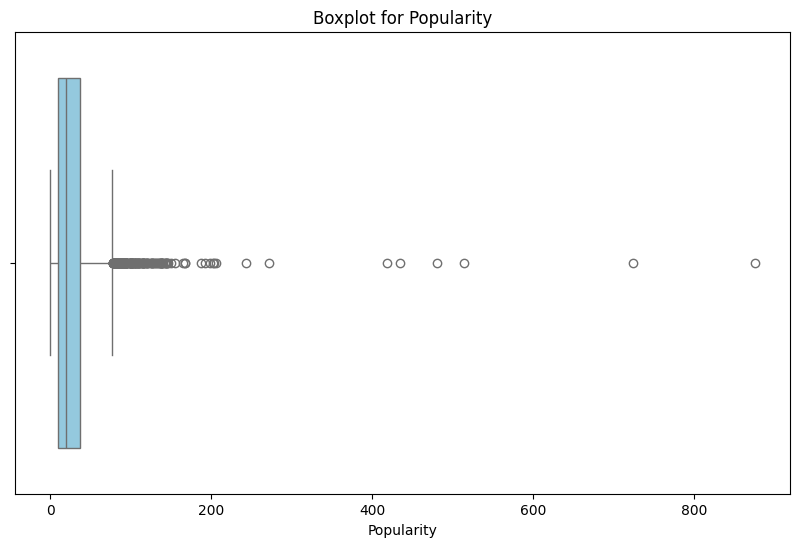

Lower bound for outliers: -29.840604624999997
Upper bound for outliers: 77.649558375
Number of outliers in 'popularity': 175
Examples of outliers:
                                    title_y  popularity
0                                    Avatar  150.437577
1  Pirates of the Caribbean: At World's End  139.082615
2                                   Spectre  107.376788
3                     The Dark Knight Rises  112.312950
5                              Spider-Man 3  115.699814


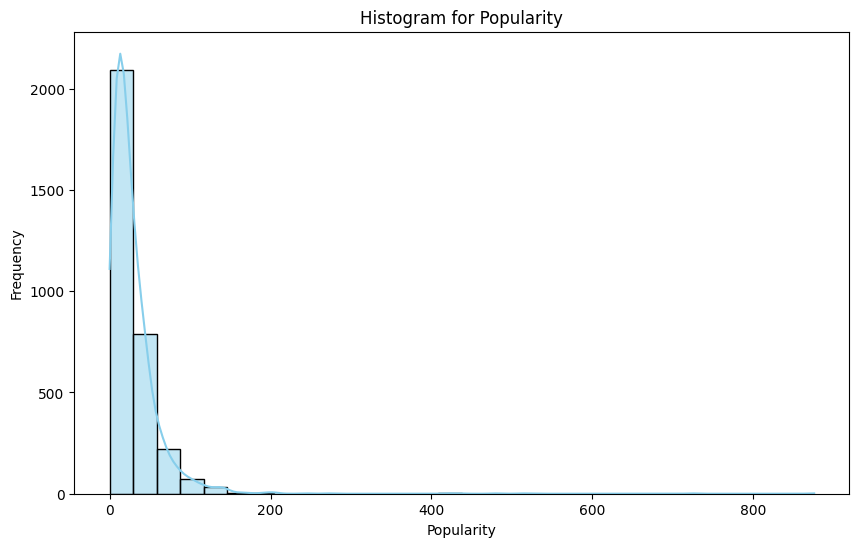

In [878]:
# Summary statistics
print("Summary statistics for 'popularity':")
print(cleaned_movies_df['popularity'].describe())

# Boxplot for popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['popularity'], color='skyblue')
plt.title("Boxplot for Popularity")
plt.xlabel("Popularity")
plt.show()

# Calculate outlier thresholds
q1 = cleaned_movies_df['popularity'].quantile(0.25)
q3 = cleaned_movies_df['popularity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = cleaned_movies_df[(cleaned_movies_df['popularity'] < lower_bound) | 
                             (cleaned_movies_df['popularity'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'popularity': {outliers.shape[0]}")

# Examples of outliers
print("Examples of outliers:")
print(outliers[['title_y', 'popularity']].head())

# Histogram for popularity
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Histogram for Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


Summary:
The popularity distribution is highly right-skewed, with the majority of movies having a low popularity score. There are significant outliers above 78.5

We decided to not transform or remove these outliers for following reasons:
- High popularity might be one of the strongest signals for predicting high revenue. By excluding or transforming it, we would risk diminishing the relationship between popularity and revenue.
- We can later group movies by popularity tiers like low, medium, high to analyze their influence on revenue without discarding data.

#### Runtime

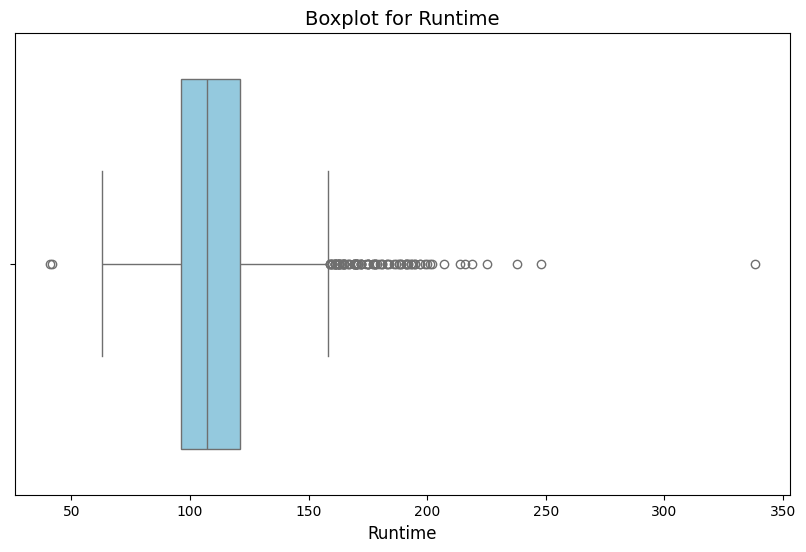

Summary statistics for 'runtime':
count    3228.000000
mean      110.724907
std        20.968920
min        41.000000
25%        96.000000
50%       107.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64


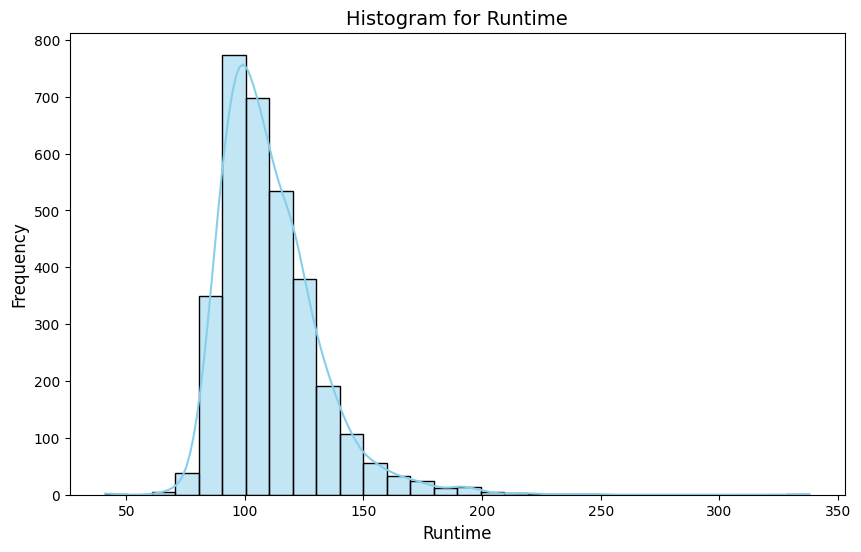

Lower bound for outliers: 58.5
Upper bound for outliers: 158.5
Number of outliers in 'runtime': 99
Examples of outliers:
                                     title_y  runtime
0                                     Avatar    162.0
1   Pirates of the Caribbean: At World's End    169.0
3                      The Dark Knight Rises    165.0
22       The Hobbit: The Desolation of Smaug    161.0
24                                 King Kong    187.0


In [879]:
# Boxplot for runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['runtime'], color="skyblue")
plt.title("Boxplot for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.show()

# Summary statistics for runtime
runtime_summary = cleaned_movies_df['runtime'].describe()
print("Summary statistics for 'runtime':")
print(runtime_summary)

# Histogram for runtime
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['runtime'], kde=True, bins=30, color="skyblue")
plt.title("Histogram for Runtime", fontsize=14)
plt.xlabel("Runtime", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Calculate IQR for runtime
Q1 = cleaned_movies_df['runtime'].quantile(0.25)
Q3 = cleaned_movies_df['runtime'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_runtime = cleaned_movies_df[(cleaned_movies_df['runtime'] < lower_bound) | (cleaned_movies_df['runtime'] > upper_bound)]
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print(f"Number of outliers in 'runtime': {len(outliers_runtime)}")
print("Examples of outliers:")
print(outliers_runtime[['title_y', 'runtime']].head())

Summary:
- The mean runtime is around 110 minutes, with a standard deviation of 20.73 minutes.
- Most movies have a runtime between 96 (25th percentile) and 121 (75th percentile) minutes.
- Outliers exist, with runtimes below 58.5 minutes (unusually short) or above 158.5 minutes (unusually long).
<br>
Box Plot:
- A significant number of movies falls within the interquartile range (IQR).
- Some extreme outliers, such as "King Kong" (187 minutes), extend well beyond the upper bound.
<br>
Histrogram:
- The distribution appears roughly normal, centered around the mean, but there is a slight right skew due to longer movies.
- A large proportion of movies have runtimes between 90 and 120 minutes.

Runtime is a meaningful feature for audience engagement for us, so retaining the outliers is important to understand these patterns. If required we could group the runtimes into categories like (short, standard, long) for better interpetability.

We have decided to keep it as it is.

#### Vote Average

Summary statistics for 'vote_average':
count    3228.000000
mean        6.309665
std         0.873846
min         0.000000
25%         5.800000
50%         6.300000
75%         6.900000
max         8.500000
Name: vote_average, dtype: float64

Lower bound for outliers: 4.149999999999999
Upper bound for outliers: 8.55
Number of outliers in 'vote_average': 43
Examples of outliers:
                                  title_y  vote_average
259               Speed 2: Cruise Control           4.1
272                        Town & Country           3.7
480                     Battlefield Earth           3.0
499                         Jack and Jill           4.1
503  The Adventures of Rocky & Bullwinkle           3.9


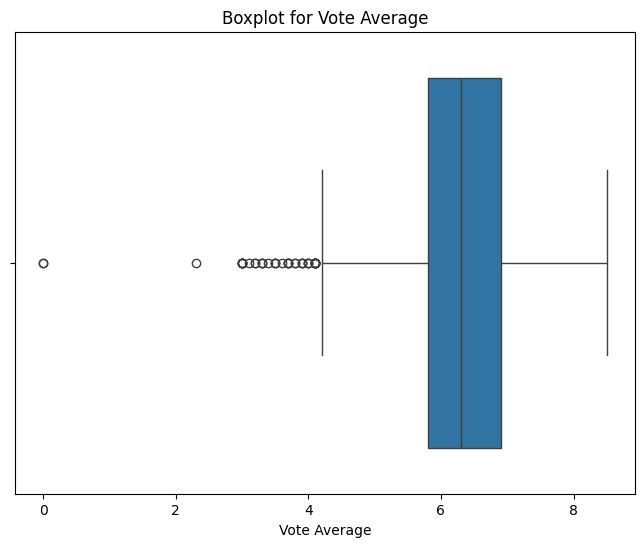

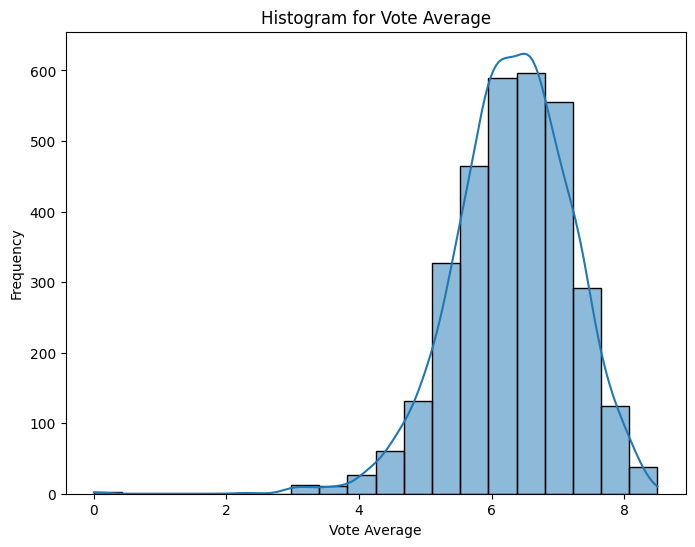

In [880]:
# Calculate summary statistics for vote_average
vote_avg_summary = cleaned_movies_df['vote_average'].describe()
print("Summary statistics for 'vote_average':")
print(vote_avg_summary)

# Calculate IQR and outliers
q1_vote_avg = vote_avg_summary['25%']
q3_vote_avg = vote_avg_summary['75%']
iqr_vote_avg = q3_vote_avg - q1_vote_avg

lower_bound_vote_avg = q1_vote_avg - 1.5 * iqr_vote_avg
upper_bound_vote_avg = q3_vote_avg + 1.5 * iqr_vote_avg

outliers_vote_avg = cleaned_movies_df[
    (cleaned_movies_df['vote_average'] < lower_bound_vote_avg) |
    (cleaned_movies_df['vote_average'] > upper_bound_vote_avg)
]

print(f"\nLower bound for outliers: {lower_bound_vote_avg}")
print(f"Upper bound for outliers: {upper_bound_vote_avg}")
print(f"Number of outliers in 'vote_average': {len(outliers_vote_avg)}")
print("Examples of outliers:")
print(outliers_vote_avg[['title_y', 'vote_average']].head())

# Plot boxplot for vote_average
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_movies_df['vote_average'])
plt.title("Boxplot for Vote Average")
plt.xlabel("Vote Average")
plt.show()

# Plot histogram for vote_average
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_movies_df['vote_average'], kde=True, bins=20)
plt.title("Histogram for Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()



Boxplot: Outliers are present on both ends, these represent movies with extremely low or high audience ratings.
<br><br>
Histogram: The distribution appears approximately normal, centered around the mean, but with some skewness due to the presence of extreme low values
<br>
<br>
Summary:
- 75% of movies have a vote average below 6.9.
- Vote averages are values reflecting audience or critic opinion. These values might provide critical insights into extreme cases like universally liked or widely disliked movies.
- These might also correlate with other features like revenue or popularity, adding value to the analysis.
<br>
<br>
Since the distribution is almost normal, a transformation like log scaling is unnecessary. We will keep it as it is.

#### Vote Count

Summary statistics for 'vote_count':
count     3228.000000
mean       977.585812
std       1414.427021
min          0.000000
25%        178.000000
50%        471.000000
75%       1148.000000
max      13752.000000
Name: vote_count, dtype: float64

Lower bound for outliers: -1277.0
Upper bound for outliers: 2603.0
Number of outliers in 'vote_count': 305
Examples of outliers:
                                    title_y  vote_count
0                                    Avatar       11800
1  Pirates of the Caribbean: At World's End        4500
2                                   Spectre        4466
3                     The Dark Knight Rises        9106
5                              Spider-Man 3        3576


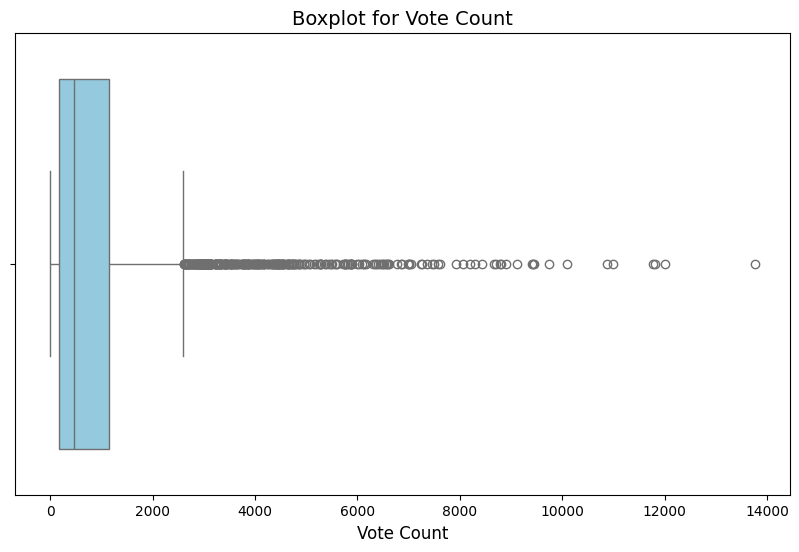

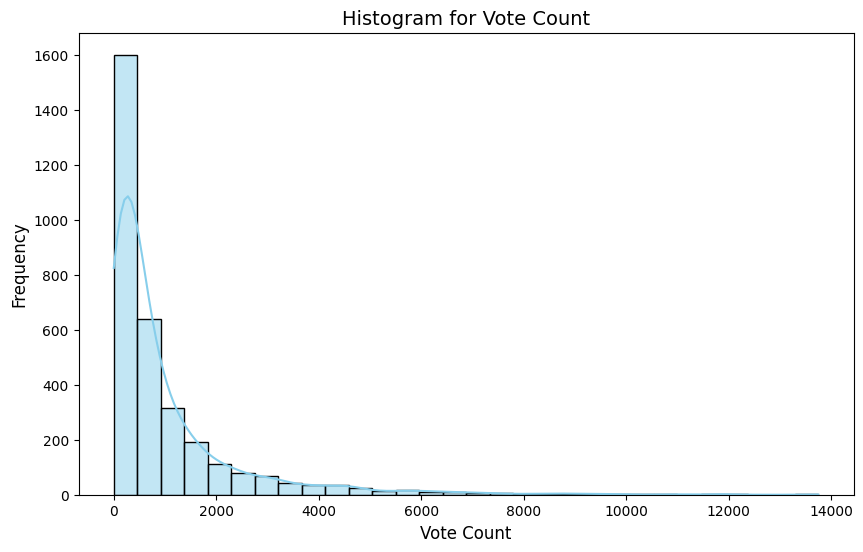

In [881]:
# Summary statistics
print("Summary statistics for 'vote_count':")
print(cleaned_movies_df['vote_count'].describe())

# Identify outliers using IQR
Q1 = cleaned_movies_df['vote_count'].quantile(0.25)
Q3 = cleaned_movies_df['vote_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_movies_df[(cleaned_movies_df['vote_count'] < lower_bound) | (cleaned_movies_df['vote_count'] > upper_bound)]
print(f"\nLower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Number of outliers in 'vote_count': {len(outliers)}")
print("Examples of outliers:")
print(outliers[['title_y', 'vote_count']].head())

# Boxplot for vote_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_movies_df['vote_count'], color="skyblue")
plt.title("Boxplot for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.show()

# Histogram for vote_count
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_movies_df['vote_count'], bins=30, kde=True, color="skyblue")
plt.title("Histogram for Vote Count", fontsize=14)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


Summary:
- Outliers like Avatar and Pirates of the Caribbean are expected because hits naturally attract more audience interaction.
- Movies with high vote counts are not data errors but instead exceptional cases. Removing them would eliminate valuable insights into audience engagement. 

We decided to perform <b> log transformation </b> on this feature as it is extremely skewed: most movies have very few votes, while a small number have exceptionally high counts and this creates an imbalance that can dominate model training and hinder its ability to generalize across all movies.

In [882]:
import numpy as np

# Apply log transformation to 'vote_count'
cleaned_movies_df['log_vote_count'] = np.log1p(cleaned_movies_df['vote_count'])

# Display a summary of the transformed feature
print("Summary statistics for 'log_vote_count':")
print(cleaned_movies_df['log_vote_count'].describe())



Summary statistics for 'log_vote_count':
count    3228.000000
mean        6.036176
std         1.452641
min         0.000000
25%         5.187386
50%         6.156979
75%         7.046647
max         9.529012
Name: log_vote_count, dtype: float64


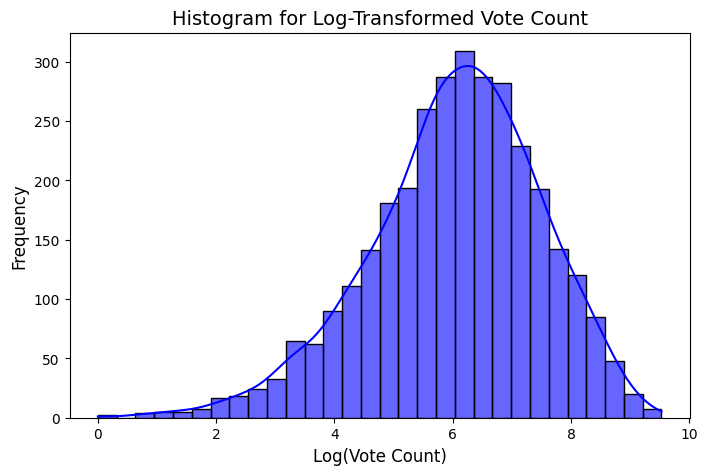

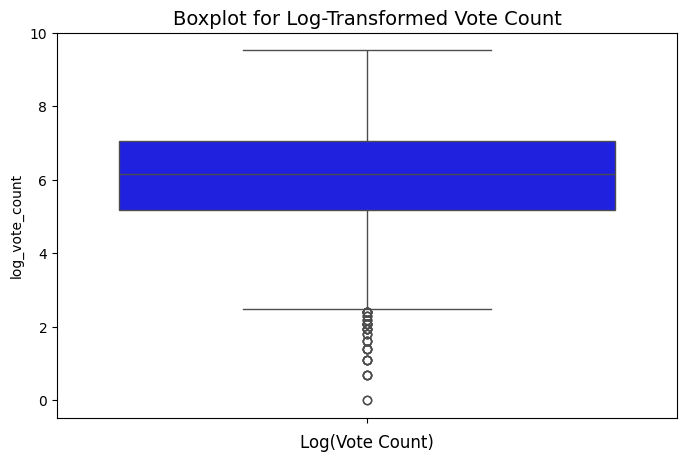

In [883]:
#Visualize it

# Histogram of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_movies_df['log_vote_count'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Boxplot of log-transformed 'vote_count'
plt.figure(figsize=(8, 5))
sns.boxplot(cleaned_movies_df['log_vote_count'], color='blue')
plt.title('Boxplot for Log-Transformed Vote Count', fontsize=14)
plt.xlabel('Log(Vote Count)', fontsize=12)
plt.show()


Summary after the transformation:
<br>
As per above, the transformation appears to have worked well:
<br>
- Histogram: The log-transformed histogram now indicates that the extreme skewness of the original data has been reduced significantly

- Boxplot: The range of values is now compressed, and the boxplot shows a much tighter interquartile range. While there are still outliers, they are less extreme in terms of deviation from the bulk of the data.

In [884]:
# lets drop the original vote_count column
cleaned_movies_df = cleaned_movies_df.drop(columns=['vote_count'])

# Rename the log-transformed column to 'vote_count'
cleaned_movies_df.rename(columns={'log_vote_count': 'vote_count'}, inplace=True)

## Feature selection, and Engineering

### 5.1 Categorical columns

Identify Categorical columns

<p>Lets first print the first 5 rows to understand some of the columns</p>

In [885]:
# Identify the categorical columns
categorical_columns = cleaned_movies_df.select_dtypes(include=['object']).columns

# Print the first 5 rows of each categorical column
print("First 5 rows of categorical columns:")
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(cleaned_movies_df[column].head())


First 5 rows of categorical columns:

Column: genres
0    [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
1                                            [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
2                                              [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]
3                  [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]
4                                   [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]
Name: genres, dtype: object

Column: keywords
0                                [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "s

Quality of Data

After the merge, we now have two <b>title</b> columns representing the same information, lets drop one.

In [886]:
# Drop the duplicate title column (title_y)
cleaned_movies_df = cleaned_movies_df.drop(columns=['title_y'])

# Rename title_x to title
cleaned_movies_df = cleaned_movies_df.rename(columns={'title_x': 'title'})

# Confirm the change
print("Columns after dropping 'title_y':")
print(cleaned_movies_df.columns)


Columns after dropping 'title_y':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'movie_id', 'cast', 'crew',
       'main_actor_names', 'main_actor_genders', 'directors', 'writers',
       'producers', 'crew_size', 'vote_count'],
      dtype='object')


### 5.2 Crew and cast

Let's further investigate the `crew` and `cast` features. 

In [887]:
import pandas as pd

# Set pandas options to display more content
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# Display the first few rows of the 'crew' and 'cast' columns
print("Expanded 'crew' column content:")
print(cleaned_movies_df['crew'].head(5))

print("\nExpanded 'cast' column content:")
print(cleaned_movies_df['cast'].head(5))

# Reset the option back to default if needed
# pd.reset_option('display.max_colwidth')


Expanded 'crew' column content:
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

The `crew` feature seems to contains interesting insights about the movies that are not mentioned anywhere else. We have already discovered that there are a lot of "Unknown" directors, writers and producers. Maybe we could be able to impute the data from `crew` into the missing values in these features. 

In [888]:
import json

# Function to extract names from the 'crew' column based on the job
def extract_names_by_job(crew_column, job_title):
    extracted_names = []
    for entry in crew_column:
        if isinstance(entry, str):  # Ensure the entry is a string
            try:
                crew_list = json.loads(entry)  # Parse JSON string
                names = [member['name'] for member in crew_list if member.get('job') == job_title]
                extracted_names.append(names)
            except json.JSONDecodeError:
                extracted_names.append([])  # Append empty list if parsing fails
        else:
            extracted_names.append([])  # Append empty list for non-string entries
    return extracted_names

# Extract names for Screenplay, Producer, and Director from the 'crew' column
cleaned_movies_df['crew_screenplay_names'] = extract_names_by_job(cleaned_movies_df['crew'], 'Screenplay')
cleaned_movies_df['crew_producer_names'] = extract_names_by_job(cleaned_movies_df['crew'], 'Producer')
cleaned_movies_df['crew_director_names'] = extract_names_by_job(cleaned_movies_df['crew'], 'Director')

# Check alignment with respective columns
cleaned_movies_df['writers_alignment'] = cleaned_movies_df.apply(
    lambda row: set(row['crew_screenplay_names']) == set(row['writers']) if isinstance(row['writers'], list) else False,
    axis=1
)

cleaned_movies_df['producers_alignment'] = cleaned_movies_df.apply(
    lambda row: set(row['crew_producer_names']) == set(row['producers']) if isinstance(row['producers'], list) else False,
    axis=1
)

cleaned_movies_df['directors_alignment'] = cleaned_movies_df.apply(
    lambda row: set(row['crew_director_names']) == set(row['directors']) if isinstance(row['directors'], list) else False,
    axis=1
)

# Display mismatched rows for verification
print("Mismatched rows for writers:")
print(cleaned_movies_df[~cleaned_movies_df['writers_alignment']][['title', 'crew_screenplay_names', 'writers']])

print("\nMismatched rows for producers:")
print(cleaned_movies_df[~cleaned_movies_df['producers_alignment']][['title', 'crew_producer_names', 'producers']])

print("\nMismatched rows for directors:")
print(cleaned_movies_df[~cleaned_movies_df['directors_alignment']][['title', 'crew_director_names', 'directors']])


Mismatched rows for writers:
                                         title  \
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
5                                 Spider-Man 3   
...                                        ...   
4773                                    Clerks   
4788                            Pink Flamingos   
4792                                      Cure   
4796                                    Primer   
4798                               El Mariachi   

                                        crew_screenplay_names  \
1                                 [Ted Elliott, Terry Rossio]   
2     [John Logan, Robert Wade, Neal Purvis, Jez Butterworth]   
3                         [Christopher Nolan, Jonathan Nolan]   
4              [Andrew Stanton, Michael Chabon, Mark Andrews]   
5                      [Sam Raimi, Alvin Sarg

It seems like we are able to do that.

In [889]:
# Function to replace "Unknown" in writers, producers, and directors with corresponding crew columns
def replace_unknowns_with_crew(df):
    # Replace "Unknown" in writers
    df['writers'] = df.apply(
        lambda row: row['crew_screenplay_names'] if row['writers'] == "Unknown" or row['writers'] == ["Unknown"] else row['writers'], 
        axis=1
    )
    # Replace "Unknown" in producers
    df['producers'] = df.apply(
        lambda row: row['crew_producer_names'] if row['producers'] == "Unknown" or row['producers'] == ["Unknown"] else row['producers'], 
        axis=1
    )
    # Replace "Unknown" in directors
    df['directors'] = df.apply(
        lambda row: row['crew_director_names'] if row['directors'] == "Unknown" or row['directors'] == ["Unknown"] else row['directors'], 
        axis=1
    )
    return df

# Apply the function
cleaned_movies_df = replace_unknowns_with_crew(cleaned_movies_df)

# Display the updated DataFrame
cleaned_movies_df.head()


budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]   
3                [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]   
4                                 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]   

       id  \
0   19995   
1     285   
2  206647   
3   49026   
4   49529   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      keywords  \
0                              [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                                               [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}

In [890]:
# Drop the helper and alignment columns
columns_to_drop = [
    'crew_screenplay_names', 
    'crew_producer_names', 
    'crew_director_names', 
    'writers_alignment', 
    'producers_alignment', 
    'directors_alignment'
]
cleaned_movies_df = cleaned_movies_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
cleaned_movies_df.head()


budget  \
0  237000000   
1  300000000   
2  245000000   
3  250000000   
4  260000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]   
3                [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]   
4                                 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]   

       id  \
0   19995   
1     285   
2  206647   
3   49026   
4   49529   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      keywords  \
0                              [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                                               [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [{"id": 470, "name": "spy"}, {"id": 818, "name": "based on novel"}, {"id": 4289, "name": "secret agent"}, {"id": 9663, "name": "sequel"}, {"id": 14555, "name": "mi6"}

Let's also see if there are any jobs that appear frequently among high grossing movies.

In [891]:
from collections import Counter
import json
import pandas as pd

# Define a threshold for the top 20% of highest-grossing movies
high_grossing_threshold = cleaned_movies_df['revenue'].quantile(0.80)

# Filter the DataFrame for top 20% highest-grossing movies
high_grossing_movies = cleaned_movies_df[cleaned_movies_df['revenue'] >= high_grossing_threshold]

# Extract all jobs from the crew column for these movies
all_jobs = []
for crew in high_grossing_movies['crew']:
    if isinstance(crew, str):  # Ensure the crew column is a string
        try:
            crew_list = json.loads(crew)  # Parse the JSON string
            all_jobs.extend([member['job'] for member in crew_list if 'job' in member])
        except json.JSONDecodeError:
            pass

# Count the frequency of each job
job_counts = Counter(all_jobs)

# Convert to a DataFrame for better readability
job_counts_df = pd.DataFrame(job_counts.items(), columns=['Job', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the 30 most frequent jobs
job_counts_df.head(30)


Job  Frequency
8                    Producer       1684
19         Executive Producer       1272
10              Art Direction       1077
9                  Screenplay       1053
4                     Casting        988
0                      Editor        882
99                  Animation        866
6                    Director        718
25  Visual Effects Supervisor        617
24            Camera Operator        584
5     Original Music Composer        583
20    Director of Photography        575
22              Makeup Artist        572
1           Production Design        538
11    Visual Effects Producer        532
16             Costume Design        502
17             Set Decoration        501
14       Sound Effects Editor        499
39   Sound Re-Recording Mixer        468
23                Hairstylist        450
21                     Stunts        448
18               Set Designer        432
50               Set Costumer        417
34            Dialogue Editor        409
13               Music Editor        395
59          Script Supervisor        384
26      Visual Effects Editor        382
15                      Foley        378
3    Supervising Sound Editor        360
33         Costume Supervisor        345

We can disregard the ones that have already existing columns so: producers, writers and directors. Let's now look into the names that are associated with the movies with the highest revenue among these jobs.

In [892]:
from collections import Counter
import pandas as pd
import json

# Define a threshold for the top 20% of highest-grossing movies
high_grossing_threshold = cleaned_movies_df['revenue'].quantile(0.80)

# Filter the DataFrame for top 20% highest-grossing movies
high_grossing_movies = cleaned_movies_df[cleaned_movies_df['revenue'] >= high_grossing_threshold]

# Extract all jobs and names from the crew column for these movies
job_name_mapping = {}
for crew in high_grossing_movies['crew']:
    if isinstance(crew, str):  # Ensure the crew column is a string
        try:
            crew_list = json.loads(crew)  # Parse the JSON string
            for member in crew_list:
                job = member.get('job')
                name = member.get('name')
                if job and name:
                    if job not in job_name_mapping:
                        job_name_mapping[job] = []
                    job_name_mapping[job].append(name)
        except json.JSONDecodeError:
            pass

# Exclude jobs already represented by producers, writers, and directors
excluded_jobs = {'Producer', 'Screenplay', 'Director'}
filtered_jobs = {job: names for job, names in job_name_mapping.items() if job not in excluded_jobs}

# Count the frequency of each job
job_counts = Counter({job: len(names) for job, names in filtered_jobs.items()})

# Get the top 10 jobs
top_10_jobs = [job for job, _ in job_counts.most_common(10)]

# Count the frequency of names for each of the top 10 jobs
top_10_jobs_names = {}
for job in top_10_jobs:
    name_counts = Counter(filtered_jobs[job])
    top_10_jobs_names[job] = name_counts.most_common(10)  # Get the top 10 names for the job

# Convert results into a readable format
top_10_names_df = pd.DataFrame({
    "Job": [job for job in top_10_jobs for _ in range(len(top_10_jobs_names[job]))],
    "Name": [name for job in top_10_jobs for name, _ in top_10_jobs_names[job]],
    "Frequency": [freq for job in top_10_jobs for _, freq in top_10_jobs_names[job]]
})

# Save the results to a CSV and display the first rows
top_10_names_df.to_csv("Top_10_Names_in_High_Grossing_Movies.csv", index=False)
print(top_10_names_df.head(50))  # Display the first 50 rows


                   Job                     Name  Frequency
0   Executive Producer                 Stan Lee         20
1   Executive Producer         Steven Spielberg         20
2   Executive Producer             Bruce Berman         17
3   Executive Producer              Thomas Tull         15
4   Executive Producer            John Lasseter         15
5   Executive Producer            Bob Weinstein         14
6   Executive Producer         Harvey Weinstein         12
7   Executive Producer         Louis D'Esposito         11
8   Executive Producer                Alan Fine         10
9   Executive Producer                Chad Oman         10
10       Art Direction         David F. Klassen          9
11       Art Direction              Ravi Bansal          9
12       Art Direction      Andrew Ackland-Snow          8
13       Art Direction              Phil Harvey          7
14       Art Direction     William Ladd Skinner          7
15       Art Direction      Keith P. Cunningham         

We can make hot encoding for them not to lose this data.

In [893]:
# Prepare the one-hot encoded columns in a dictionary
encoded_columns = {}
for job, names in top_10_jobs_names_dict.items():
    for name in names:
        column_name = f"{job}_{name}"
        encoded_columns[column_name] = cleaned_movies_df['crew'].apply(
            lambda crew: 1 if isinstance(crew, str) and name in crew else 0
        )

# Convert the dictionary to a DataFrame
encoded_df = pd.DataFrame(encoded_columns)

# Concatenate the new encoded DataFrame with the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, encoded_df], axis=1)

# Print the column names of the updated DataFrame
print(cleaned_movies_df.columns.tolist())


['budget', 'genres', 'id', 'keywords', 'original_language', 'original_title', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'movie_id', 'cast', 'crew', 'main_actor_names', 'main_actor_genders', 'directors', 'writers', 'producers', 'crew_size', 'vote_count', 'Executive Producer_Stan Lee', 'Executive Producer_Steven Spielberg', 'Executive Producer_Bruce Berman', 'Executive Producer_Thomas Tull', 'Executive Producer_John Lasseter', 'Executive Producer_Bob Weinstein', 'Executive Producer_Harvey Weinstein', "Executive Producer_Louis D'Esposito", 'Executive Producer_Alan Fine', 'Executive Producer_Chad Oman', 'Art Direction_David F. Klassen', 'Art Direction_Ravi Bansal', 'Art Direction_Andrew Ackland-Snow', 'Art Direction_Phil Harvey', 'Art Direction_William Ladd Skinner', 'Art Direction_Keith P. Cunningham', 'Art Direction_William James Teegarden', 'Art Direction_Sean Haworth', 'Art Direction_

This hot-encoding significantly enlarges our dataset, however, we can use tree-based models which can handle that.


In [894]:
# Drop cast, and crew columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['cast', 'crew'])

# Confirm the change
print("Columns after dropping 'cast' and 'crew':")
print(cleaned_movies_df.columns)


Columns after dropping 'cast' and 'crew':
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date',
       ...
       'Makeup Artist_Bill Corso', 'Makeup Artist_Ve Neill',
       'Makeup Artist_Deborah La Mia Denaver',
       'Makeup Artist_Daniel C. Striepeke', 'Makeup Artist_Sian Grigg',
       'Makeup Artist_Angela Levin', 'Makeup Artist_Michèle Burke',
       'Makeup Artist_Todd Kleitsch', 'Makeup Artist_Michal Bigger',
       'Makeup Artist_Donald Mowat'],
      dtype='object', length=123)


### 5.3 Keywords

Let's look into the `keywords` column and see how can we transform it.

In [895]:
print(cleaned_movies_df['keywords'].value_counts())

keywords
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    97
[{"id": 10183, "name": "independent film"}]                                                                                                                                                                                                                                                                                                                                           

Let's see what keywords are the most frequent among the top 20% of the movies with the highest revenue

In [896]:
import json
from collections import Counter

# Step 1: Filter the top 20% of movies based on revenue
top_20_percent = cleaned_movies_df.nlargest(int(0.2 * len(cleaned_movies_df)), 'revenue')

# Step 2: Function to extract 'name' values from JSON-like strings
def extract_keyword_names(kw_column):
    all_keywords = []
    for entry in kw_column:
        if isinstance(entry, str) and entry.startswith("["):  # Check if entry is JSON-like
            try:
                keyword_list = json.loads(entry)  # Parse the JSON string
                names = [kw['name'] for kw in keyword_list if 'name' in kw]
                all_keywords.extend(names)
            except json.JSONDecodeError:
                pass  # Ignore rows that fail to parse
    return all_keywords

# Step 3: Extract keywords from the top 20% movies
top_keywords = extract_keyword_names(top_20_percent['keywords'])

# Step 4: Count the occurrences of each keyword
keyword_counts = Counter(top_keywords)

# Step 5: Display the top 20 most common keywords
top_20_keywords = keyword_counts.most_common(20)
print("Top 20 Most Frequent Keywords Among Top 20% Movies by Revenue:")
for keyword, count in top_20_keywords:
    print(f"{keyword}: {count}")


Top 20 Most Frequent Keywords Among Top 20% Movies by Revenue:
duringcreditsstinger: 96
3d: 59
aftercreditsstinger: 52
based on novel: 50
sequel: 46
superhero: 42
dystopia: 41
based on comic book: 34
violence: 31
marvel comic: 28
woman director: 26
alien: 24
saving the world: 24
revenge: 22
magic: 22
friendship: 22
secret identity: 18
witch: 18
undercover: 18
imax: 17


Let's make hot-encoded columns for the most successful keywords.

In [897]:
import json
import pandas as pd

# Step 1: Parse and explode the 'keywords' column into individual rows
def parse_and_expand_keywords(df, keywords_column):
    """
    Parse the JSON-like strings in the keywords column and explode them into individual rows.
    """
    df[keywords_column] = df[keywords_column].apply(
        lambda x: json.loads(x) if isinstance(x, str) and x.startswith("[") else []
    )
    return df.explode(keywords_column)

# Step 2: Calculate total revenue for each keyword
def calculate_keyword_revenue(df, keywords_column, revenue_column):
    """
    Calculate the total revenue for each keyword.
    """
    keyword_revenue_df = (
        df.dropna(subset=[keywords_column])  # Remove rows with no keywords
        .assign(Keyword=lambda x: x[keywords_column].apply(lambda kw: kw.get('name') if isinstance(kw, dict) else None))
        .dropna(subset=['Keyword'])  # Remove rows where 'name' was not present
        .groupby('Keyword')[revenue_column]
        .sum()
        .reset_index()
        .rename(columns={revenue_column: 'Total_Revenue'})
    )
    return keyword_revenue_df

# Step 3: One-hot encode the top N keywords
def one_hot_encode_keywords(df, keywords_column, top_keywords):
    """
    Create one-hot encoded columns for the top keywords.
    """
    for keyword in top_keywords:
        column_name = f'keyword_{keyword.replace(" ", "_")}'  # Ensure valid column names
        df[column_name] = df[keywords_column].apply(
            lambda x: 1 if any(kw.get('name') == keyword for kw in x if isinstance(kw, dict)) else 0
        )
    return df

# Apply the steps to the DataFrame
# Step 1: Parse and explode keywords
expanded_keywords_df = parse_and_expand_keywords(cleaned_movies_df.copy(), 'keywords')

# Step 2: Calculate revenue per keyword and get the top 30
keyword_revenue_df = calculate_keyword_revenue(expanded_keywords_df, 'keywords', 'revenue')
top_30_keywords = keyword_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(30)['Keyword'].tolist()

# Step 3: Create one-hot encoded columns for the top 30 keywords
cleaned_movies_df = one_hot_encode_keywords(cleaned_movies_df, 'keywords', top_30_keywords)

# Step 4: Optionally drop the original keywords column
cleaned_movies_df = cleaned_movies_df.drop(columns=['keywords'], errors='ignore')

# Step 5: Display the updated DataFrame with one-hot encoded keyword columns
columns_to_display = ['title'] + [f'keyword_{keyword.replace(" ", "_")}' for keyword in top_30_keywords]
print(cleaned_movies_df[columns_to_display].head())


                                      title  keyword_duringcreditsstinger  \
0                                    Avatar                             0   
1  Pirates of the Caribbean: At World's End                             0   
2                                   Spectre                             0   
3                     The Dark Knight Rises                             0   
4                               John Carter                             0   

   keyword_3d  keyword_aftercreditsstinger  keyword_based_on_novel  \
0           0                            0                       0   
1           0                            0                       0   
2           0                            0                       0   
3           0                            0                       0   
4           0                            0                       0   

   keyword_sequel  keyword_superhero  keyword_dystopia  \
0               0                  0                 0   


### 5.4 Original language

Now lets see how many movies contain English as orignal language ? It might help narrow our approach to just english since our secondary dataset contains talk shows that are only in English.

In [898]:
print(cleaned_movies_df['original_language'].value_counts())



original_language
en    3101
fr      25
es      15
ja      13
zh      13
de       9
hi       7
it       6
ru       6
cn       5
ko       5
da       4
pt       2
th       2
nl       2
id       2
te       1
is       1
xx       1
nb       1
af       1
he       1
pl       1
vi       1
ro       1
no       1
fa       1
Name: count, dtype: int64


Majority of our data contains English as orignal language. We have decided to drop the rows for the rest, as this helps narrow our approach to English origin films.

In [899]:
# Step 1: Define the filtering logic for all subsets
def filter_english_movies(df):
    return df[df['original_language'] == 'en'].drop(columns=['original_language'], errors='ignore')

# Step 2: Apply the filtering logic cleaned_movies_df

cleaned_movies_df = filter_english_movies(cleaned_movies_df)  # Apply to cleaned_movies_df



### 5.5 Genres

Lets look at Unique values in genres

In [900]:
print("Unique values in genres:\n", cleaned_movies_df['genres'].unique()[:15])

Unique values in genres:
 ['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 1

- Column contains JSON-like string containing lists of dictionaries, which indicates it needs parsing to extract useful information. We have decided that we will extract the Genre ex: `Action`, etc. We will create a new column with the extracted information, and finally drop the orignal genres column as it will no longer be relevant.

In [901]:
import ast

def parse_genres(genres_str):

    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except (ValueError, SyntaxError):
        return []

cleaned_movies_df['parsed_genres'] = cleaned_movies_df['genres'].apply(parse_genres)

# Lets verify that it worked, before we drop the original column
print("Parsed 'genres' column results:")
print(cleaned_movies_df[['id', 'genres', 'parsed_genres']].head())


Parsed 'genres' column results:
       id  \
0   19995   
1     285   
2  206647   
3   49026   
4   49529   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   
2                                            [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]   
3                [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]   
4                                 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]   

                                   parsed_

In [902]:
# Lets drop the original column
cleaned_movies_df = cleaned_movies_df.drop(columns=['genres'])

# confirm the column has been dropped
print("Columns after dropping 'genres':")
print(cleaned_movies_df.columns)



Columns after dropping 'genres':
Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages',
       ...
       'keyword_dying_and_death', 'keyword_secret_identity', 'keyword_battle',
       'keyword_based_on_young_adult_novel', 'keyword_future',
       'keyword_musical', 'keyword_love', 'keyword_space', 'keyword_daughter',
       'parsed_genres'],
      dtype='object', length=151)


The parsed_genres column contains lists of genres for each movie, a single movie can contain multiple genres. However, we need to process it further to make it more useful for analysis and modeling as machine learning models can not directly process lists.

We decided to proceed with One-Hot encoding which would create separate columns for each unique genre.
A value of `1` indicates the movie belongs to that genre.

In [903]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()

# Apply one-hot encoding to the parsed_genres column
genres_one_hot = pd.DataFrame(mlb.fit_transform(cleaned_movies_df['parsed_genres']),
                              columns=mlb.classes_,
                              index=cleaned_movies_df.index)

# Concatenate the one-hot encoded genres back to the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, genres_one_hot], axis=1)

# Verify by including the movie title alongside parsed_genres and one-hot encoded genres
columns_to_display = ['title', 'parsed_genres'] + list(genres_one_hot.columns)

# Display the first few rows
print(cleaned_movies_df[columns_to_display].head())


                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                   parsed_genres  Action  Adventure  \
0  [Action, Adventure, Fantasy, Science Fiction]       1          1   
1                   [Adventure, Fantasy, Action]       1          1   
2                     [Action, Adventure, Crime]       1          1   
3               [Action, Crime, Drama, Thriller]       1          0   
4           [Action, Adventure, Science Fiction]       1          1   

   Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  Foreign  \
0          0       0      0            0      0       0        1        0   
1          0       0      0            0      0       0        1        0   
2          0       0      1            0      0       0    

Let's take a look at the correlation between the genre and the budget of the movie

In [904]:
# Step 1: Select the genre columns (one-hot encoded columns)
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 
    'Romance', 'Science Fiction', 'Thriller', 'War'
]

# Step 2: Calculate the correlation of each genre with budget
genre_budget_correlation = cleaned_movies_df[genre_columns + ['budget']].corr()['budget'].drop('budget')

# Step 3: Display the correlations
print("Correlation of Genres with Budget:")
print(genre_budget_correlation)


Correlation of Genres with Budget:
Action             0.315903
Adventure          0.419097
Animation          0.243651
Comedy            -0.081446
Crime             -0.060963
Documentary       -0.088345
Drama             -0.213763
Family             0.223201
Fantasy            0.275545
Foreign           -0.030958
History           -0.010469
Horror            -0.158812
Music             -0.075659
Mystery           -0.014940
Romance           -0.132295
Science Fiction    0.198683
Thriller           0.000907
War                0.005935
Name: budget, dtype: float64


We can see that some of these genres can have a significant impact on the movie's budget.

In [905]:
# Drop the parsed_genres column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_genres'])

# Verify that the column has been dropped
print("Columns after dropping 'parsed_genres':")
print(cleaned_movies_df.columns)

Columns after dropping 'parsed_genres':
Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages',
       ...
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object', length=169)


### 5.6 Production companies

In [906]:
# Explore the structure of the 'production_companies' column
print("First 5 rows of 'production_companies':")
print(cleaned_movies_df['production_companies'].head())

First 5 rows of 'production_companies':
0    [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]
1                                                                  [{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]
2                                                                                                        [{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]
3                                                   [{"name": "Legendary Pictures", "id": 923}, {"name": "Warner Bros.", "id": 6194}, {"name": "DC Entertainment", "id": 9993}, {"name": "Syncopy", "id": 9996}]
4                                                                                                                           

It contains JSON-like strings with lists of company names. 

This means we need to parse the strings to extract the `name` of the production companies.

In [907]:
# Function to parse JSON-like strings and extract production company names
def parse_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)  # Safely evaluate the string to a list of dictionaries
        return [company['name'] for company in companies_list]  # Extract the 'name' of each company
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails
    

# Apply the function to parse production companies
cleaned_movies_df['parsed_production_companies'] = cleaned_movies_df['production_companies'].apply(parse_production_companies)

In [908]:
# print the first 5 rows of the production_companies column
print(cleaned_movies_df['parsed_production_companies'].head())



0    [Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]
1                                           [Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]
2                                                                                   [Columbia Pictures, Danjaq, B24]
3                                                      [Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]
4                                                                                             [Walt Disney Pictures]
Name: parsed_production_companies, dtype: object


It seems that a single movie might involves multiple production companies collaborating.

Having multiple companies may correlate with higher budgets or better distribution networks, potentially impacting `revenue`.

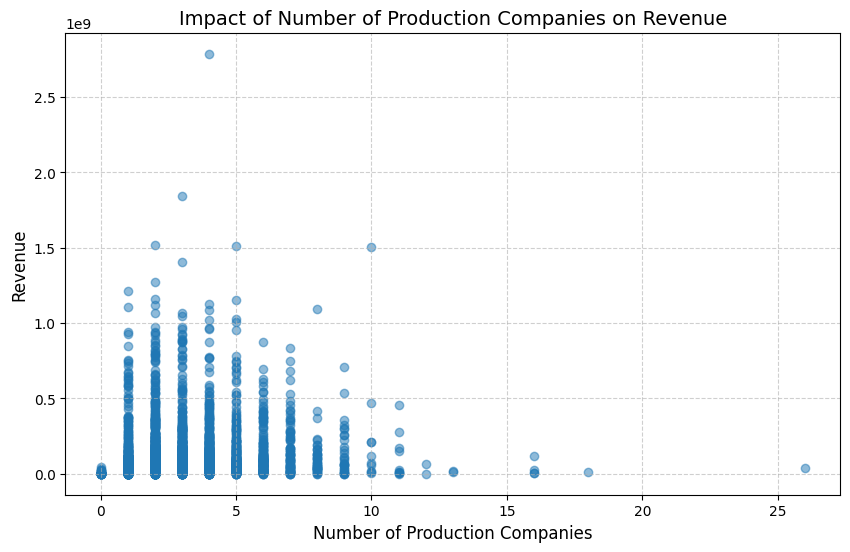

In [909]:
import matplotlib.pyplot as plt

# Calculate the number of production companies for each movie
cleaned_movies_df['num_production_companies'] = cleaned_movies_df['production_companies'].apply(
    lambda x: len(json.loads(x)) if isinstance(x, str) else 0
)

# Scatter plot to show the relationship between number of production companies and revenue
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_movies_df['num_production_companies'], cleaned_movies_df['revenue'], alpha=0.5)
plt.title('Impact of Number of Production Companies on Revenue', fontsize=14)
plt.xlabel('Number of Production Companies', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Observations: It seems like the highest grossing movies are an effect of collaboration between 2 or 3 companies. Maybe it will be better to look into specific companies.

Let's hot-encode the top 20 production companies

In [910]:
import pandas as pd

def get_top_companies_by_revenue(df, company_column, revenue_column, top_n=20):
    """
    Function to identify the top companies by revenue and create one-hot encoded columns for them.
    Args:
        df (pd.DataFrame): DataFrame containing production companies and revenues.
        company_column (str): Column with production companies (list format).
        revenue_column (str): Column with revenue values.
        top_n (int): Number of top companies to include.

    Returns:
        pd.DataFrame: Updated DataFrame with one-hot encoded columns for top companies.
        list: List of top companies by revenue.
    """
    # Expand the company column into individual rows
    expanded_df = df.explode(company_column)
    
    # Group by company and calculate total revenue
    company_revenue_df = (
        expanded_df.groupby(company_column)[revenue_column]
        .sum()
        .reset_index()
        .rename(columns={company_column: 'Company', revenue_column: 'Total_Revenue'})
    )
    
    # Sort companies by revenue in descending order
    top_revenue_companies_df = company_revenue_df.sort_values(by='Total_Revenue', ascending=False)
    
    # Select the top N companies
    top_companies = top_revenue_companies_df.head(top_n)['Company'].tolist()
    
    # Create one-hot encoded columns for the top companies
    for company in top_companies:
        column_name = f'company_{company.replace(" ", "_")}'  # Ensure valid column names
        df[column_name] = df[company_column].apply(lambda x: 1 if company in x else 0)
    
    return df, top_companies

# Apply the function to the dataset
cleaned_movies_df, top_20_revenue_companies = get_top_companies_by_revenue(
    df=cleaned_movies_df,
    company_column='parsed_production_companies',
    revenue_column='revenue',
    top_n=20
)

# Verify the new columns
columns_to_display = ['title', 'parsed_production_companies'] + [f'company_{company.replace(" ", "_")}' for company in top_20_revenue_companies]
print("Top 20 production companies by revenue and their encoded columns:")
print(cleaned_movies_df[columns_to_display].head())


Top 20 production companies by revenue and their encoded columns:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                                                       parsed_production_companies  \
0  [Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]   
1                                         [Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions]   
2                                                                                 [Columbia Pictures, Danjaq, B24]   
3                                                    [Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]   
4                                                            

In [911]:
# Drop the parsed_production_companies column
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_production_companies','production_companies'])


### 5.7 Production countries

Lets move on to the `production_countries`

Certain countries like the US may dominate movie production.<br>
Movie production in certain countries like Canada can have an impact on the movie budget as certain countries offer Tax incentives, and lower production costs. 

In [912]:
# Inspect the first 5 rows of 'production_countries'
print("First 5 rows of 'production_countries':")
print(cleaned_movies_df['production_countries'].head())

# Analyze unique values in the column
unique_countries = cleaned_movies_df['production_countries'].unique()
print("\nNumber of unique entries in 'production_countries':", len(unique_countries))



First 5 rows of 'production_countries':
0    [{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]
1                                                    [{"iso_3166_1": "US", "name": "United States of America"}]
2    [{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]
3                                                    [{"iso_3166_1": "US", "name": "United States of America"}]
4                                                    [{"iso_3166_1": "US", "name": "United States of America"}]
Name: production_countries, dtype: object

Number of unique entries in 'production_countries': 273


- The column also requires parsing to extract the name field
- 273 unique entries indicate a significant variety, but it's likely dominated by a few frequent countries like US
    - After parsing, lets count how often each country appears to identify the most frequent ones.

In [913]:
# Parse the Column

# Function to parse JSON-like strings and extract country codes
def parse_countries(countries_str):
    try:
        countries_list = ast.literal_eval(countries_str)  # Safely evaluate the string to a list of dictionaries
        return [country['iso_3166_1'] for country in countries_list]  # Extract the 'name' of each country
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse production countries
cleaned_movies_df['parsed_production_countries'] = cleaned_movies_df['production_countries'].apply(parse_countries)

# Verify the parsed results
print("Parsed 'production_countries' column results:")
print(cleaned_movies_df[['production_countries', 'parsed_production_countries']].head())


Parsed 'production_countries' column results:
                                                                                         production_countries  \
0  [{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]   
1                                                  [{"iso_3166_1": "US", "name": "United States of America"}]   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]   
3                                                  [{"iso_3166_1": "US", "name": "United States of America"}]   
4                                                  [{"iso_3166_1": "US", "name": "United States of America"}]   

  parsed_production_countries  
0                    [US, GB]  
1                        [US]  
2                    [GB, US]  
3                        [US]  
4                        [US]  


It appears that a movie could be producted in more than a single country. Lets now look at the frequency.

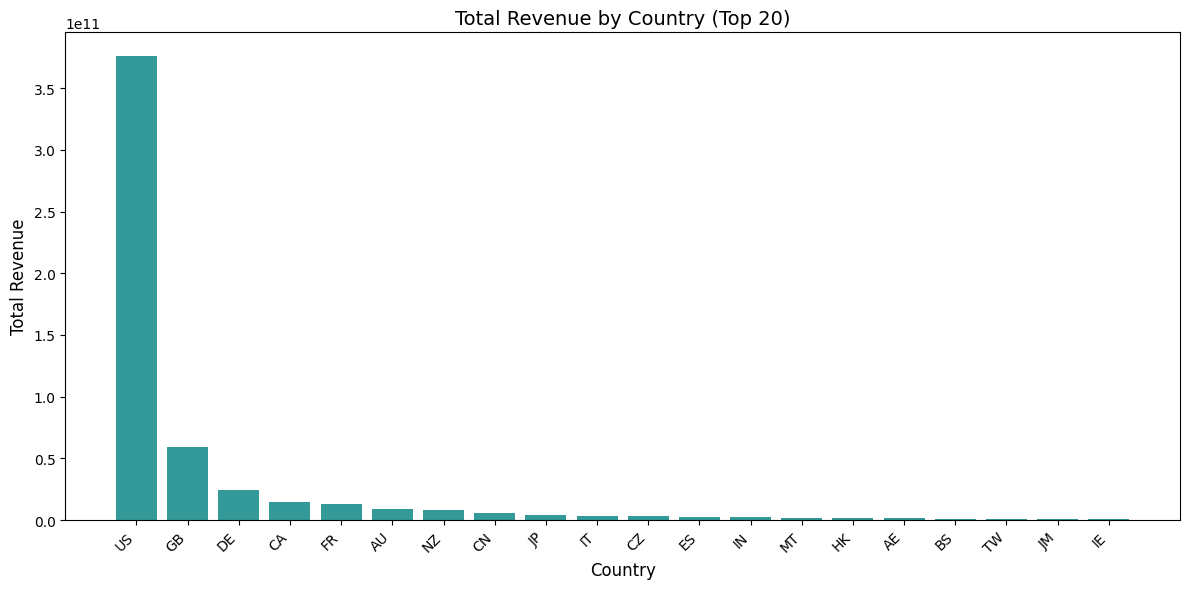

In [914]:
import matplotlib.pyplot as plt
import pandas as pd

# Expand the 'parsed_production_countries' into individual rows
expanded_countries_df = cleaned_movies_df.explode('parsed_production_countries')

# Group by country and calculate total revenue
country_revenue_df = (
    expanded_countries_df.groupby('parsed_production_countries')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'parsed_production_countries': 'Country', 'revenue': 'Total_Revenue'})
)

# Sort countries by total revenue in descending order
top_revenue_countries_df = country_revenue_df.sort_values(by='Total_Revenue', ascending=False)

# Plot the top 20 countries by total revenue
plt.figure(figsize=(12, 6))
plt.bar(top_revenue_countries_df['Country'][:20], top_revenue_countries_df['Total_Revenue'][:20], alpha=0.8, color='teal')
plt.title('Total Revenue by Country (Top 20)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


Observation: 
- US appears in 2892 movies, making it the most dominant production country.
- Countries like the UK, Germany, France, and Canada have significant representation but are far behind the US.
- Only 13 appear once, indicating minimal influence.



The dominance of US is likely correlated with other features like budget, popularity, or revenue. Lets explore that further with **Correlation Analysis**

In [915]:
import pandas as pd

# Expand the 'parsed_production_countries' into individual rows
expanded_countries_df = cleaned_movies_df.explode('parsed_production_countries')

# Group by country and calculate total revenue
country_revenue_df = (
    expanded_countries_df.groupby('parsed_production_countries')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'parsed_production_countries': 'Country', 'revenue': 'Total_Revenue'})
)

# Sort countries by total revenue in descending order
top_revenue_countries = country_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(15)['Country'].tolist()

# Create binary columns for the top 15 countries by revenue
for country in top_revenue_countries:
    column_name = f'is_{country}'  # Create a valid column name
    cleaned_movies_df[column_name] = cleaned_movies_df['parsed_production_countries'].apply(
        lambda x: 1 if country in x else 0
    )

# Create a column for the number of countries involved in the production of each movie
cleaned_movies_df['num_countries'] = cleaned_movies_df['parsed_production_countries'].apply(len)

# Verify the new columns
columns_to_display = ['title', 'parsed_production_countries', 'num_countries'] + [f'is_{country}' for country in top_revenue_countries]
print("Top 15 countries by revenue and their encoded columns:")
print(cleaned_movies_df[columns_to_display].head())

# Check correlations with numerical features
correlation_with_countries = cleaned_movies_df[
    ['num_countries', 'budget', 'popularity', 'revenue'] + [f'is_{country}' for country in top_revenue_countries]
].corr()
print("\nCorrelations with numerical features:")
print(correlation_with_countries['revenue'].sort_values(ascending=False))


Top 15 countries by revenue and their encoded columns:
                                      title parsed_production_countries  \
0                                    Avatar                    [US, GB]   
1  Pirates of the Caribbean: At World's End                        [US]   
2                                   Spectre                    [GB, US]   
3                     The Dark Knight Rises                        [US]   
4                               John Carter                        [US]   

   num_countries  is_US  is_GB  is_DE  is_CA  is_FR  is_AU  is_NZ  is_CN  \
0              2      1      1      0      0      0      0      0      0   
1              1      1      0      0      0      0      0      0      0   
2              2      1      1      0      0      0      0      0      0   
3              1      1      0      0      0      0      0      0      0   
4              1      1      0      0      0      0      0      0      0   

   is_JP  is_IT  is_CZ  is_ES  is_IN 

The correlation is low but since US is overwhelmingly dominant here. Given this, the feature has little variability.

Since there are movies proced in multiple countries. We have decided to **create a feature representing the number of production countries** instead, as it indicates international collaborations, which could influence revenue. 

In [916]:
# Create a feature representing the number of production countries for each movie
cleaned_movies_df['num_production_countries'] = cleaned_movies_df['parsed_production_countries'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_production_countries':")
print(cleaned_movies_df[['title', 'parsed_production_countries', 'num_production_countries']].head())

# Analyze the distribution of 'num_production_countries'
country_count_distribution = cleaned_movies_df['num_production_countries'].value_counts()
print("\nDistribution of 'num_production_countries':")
print(country_count_distribution)


First 5 rows with 'num_production_countries':
                                      title parsed_production_countries  \
0                                    Avatar                    [US, GB]   
1  Pirates of the Caribbean: At World's End                        [US]   
2                                   Spectre                    [GB, US]   
3                     The Dark Knight Rises                        [US]   
4                               John Carter                        [US]   

   num_production_countries  
0                         2  
1                         1  
2                         2  
3                         1  
4                         1  

Distribution of 'num_production_countries':
num_production_countries
1     2255
2      582
3      170
4       64
0       14
5       12
6        2
12       1
8        1
Name: count, dtype: int64


Observations
- A majority of movies (2256) are produced in only one country. These are likely dominated by US-based productions.

- Movies with 2 or more countries involved (582 with 2 countries, 170 with 3 countries) indicate international collaborations, which might have unique effects on revenue.

- A few movies have a high number of production countries (6, 8, 12). These could represent co-productions across multiple regions, worth further investigation.

- Missing Values: 14 movies have 0 production countries listed.

In [917]:
import ast
import pandas as pd

# Step 1: Define the cleaning function for cleaned_movies_df
def clean_cleaned_movies_df(df):
    # Drop rows where 'num_production_countries' is 0
    df = df[df['num_production_countries'] > 0]
    # Drop redundant columns
    columns_to_drop = ['production_countries', 'parsed_production_countries']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    return df

#

# Step 3: Apply the cleaning logic to each dataset
cleaned_movies_df = clean_cleaned_movies_df(cleaned_movies_df)  # Use logic specific to cleaned_movies_df





### 5.8 Spoken languages

The `spoken_languages` column is another important feature to explore, as it might provide insights into a movie’s accessibility or cultural reach

In [918]:
# Inspect the first few rows of 'spoken_languages'
print("First 5 rows of 'spoken_languages':")
print(cleaned_movies_df['spoken_languages'].head())

# Check for missing values in 'spoken_languages'
missing_languages = cleaned_movies_df['spoken_languages'].isnull().sum()
print("\nMissing values in 'spoken_languages':", missing_languages)

# Analyze unique values
unique_languages = cleaned_movies_df['spoken_languages'].unique()
print("\nNumber of unique entries in 'spoken_languages':", len(unique_languages))


First 5 rows of 'spoken_languages':
0                                                                                                                                   [{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]
1                                                                                                                                                                                [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]
3                                                                                                                                                                                [{"iso_639_1": "en", "name": "English"}]
4                                                                                           

Obersations:
- JSON-Like Strings
- 383 unique entries suggest combinations of languages, not just individual ones.

Approach:
- Extract the language codes for each movie
- Find language diversity: Add a column counting the number of spoken languages

In [919]:

# Function to parse JSON-like strings and extract language codes
def parse_languages(languages_str):
    try:
        languages_list = ast.literal_eval(languages_str)  # Safely evaluate the string to a list of dictionaries
        return [language['iso_639_1'] for language in languages_list]  # Extract the 'iso_639_1' code
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

# Apply the function to parse spoken languages
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Verify the parsed results
print(cleaned_movies_df[['parsed_spoken_languages']].head())

  parsed_spoken_languages
0                [en, es]
1                    [en]
2    [fr, en, es, it, de]
3                    [en]
4                    [en]


In [920]:
# Count the number of spoken languages for each movie
cleaned_movies_df['parsed_spoken_languages'] = cleaned_movies_df['spoken_languages'].apply(parse_languages)

# Create a feature for the number of spoken languages
cleaned_movies_df['num_spoken_languages'] = cleaned_movies_df['parsed_spoken_languages'].apply(len)

# Verify the new feature
print("First 5 rows with 'num_spoken_languages':")
print(cleaned_movies_df[['title', 'parsed_spoken_languages', 'num_spoken_languages']].head())

First 5 rows with 'num_spoken_languages':
                                      title parsed_spoken_languages  \
0                                    Avatar                [en, es]   
1  Pirates of the Caribbean: At World's End                    [en]   
2                                   Spectre    [fr, en, es, it, de]   
3                     The Dark Knight Rises                    [en]   
4                               John Carter                    [en]   

   num_spoken_languages  
0                     2  
1                     1  
2                     5  
3                     1  
4                     1  


In [921]:
# Analyze the distribution of 'num_spoken_languages'
language_count_distribution = cleaned_movies_df['num_spoken_languages'].value_counts()
print("\nDistribution of 'num_spoken_languages':")
print(language_count_distribution)


Distribution of 'num_spoken_languages':
num_spoken_languages
1    2127
2     582
3     221
4      92
5      39
6      17
7       3
8       3
0       2
9       1
Name: count, dtype: int64


In [922]:
# Step 1: Parse spoken languages into individual rows for analysis
expanded_languages_df = cleaned_movies_df.explode('parsed_spoken_languages')

# Step 2: Group by language and calculate total revenue
language_revenue_df = (
    expanded_languages_df.groupby('parsed_spoken_languages')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'parsed_spoken_languages': 'Language', 'revenue': 'Total_Revenue'})
)

# Step 3: Sort languages by total revenue in descending order
top_revenue_languages = language_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(6)['Language'].tolist()

# Step 4: Create one-hot encoded columns for the top 6 languages
for language in top_revenue_languages:
    column_name = f'lang_{language.replace(" ", "_")}'  # Create a valid column name
    cleaned_movies_df[column_name] = cleaned_movies_df['parsed_spoken_languages'].apply(
        lambda x: 1 if language in x else 0
    )

# Verify the newly created columns
columns_to_display = ['title', 'parsed_spoken_languages'] + [f'lang_{language.replace(" ", "_")}' for language in top_revenue_languages]
print("Top 6 languages by revenue and their encoded columns:")
print(cleaned_movies_df[columns_to_display].head())


Top 6 languages by revenue and their encoded columns:
                                      title parsed_spoken_languages  lang_en  \
0                                    Avatar                [en, es]        1   
1  Pirates of the Caribbean: At World's End                    [en]        1   
2                                   Spectre    [fr, en, es, it, de]        1   
3                     The Dark Knight Rises                    [en]        1   
4                               John Carter                    [en]        1   

   lang_fr  lang_es  lang_de  lang_it  lang_ru  
0        0        1        0        0        0  
1        0        0        0        0        0  
2        1        1        1        1        0  
3        0        0        0        0        0  
4        0        0        0        0        0  


In [923]:
# Drop the redundant columns
cleaned_movies_df = cleaned_movies_df.drop(columns=['spoken_languages'])
cleaned_movies_df = cleaned_movies_df.drop(columns=['parsed_spoken_languages'])

# Verify the column has been dropped
print("Columns after dropping 'spoken_languages':")
print(cleaned_movies_df.columns)

Columns after dropping 'spoken_languages':
Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'movie_id',
       ...
       'is_HK', 'num_countries', 'num_production_countries',
       'num_spoken_languages', 'lang_en', 'lang_fr', 'lang_es', 'lang_de',
       'lang_it', 'lang_ru'],
      dtype='object', length=211)


### 5.9 Release date

Let's move on to `release_date`
This is another important feature to explore, as it can provide valuable patterns like seasonal trends, summer blockbustrs, certain days. Additionally, we can refer to this when checking the appearance of stars during a movie release on talk shows.

Let's first look at the data, and come up with a plan.

In [924]:
# Inspect the first few rows and data type of 'release_date'
print("First 5 rows of 'release_date':")
print(cleaned_movies_df['release_date'].head())

# Check for missing or invalid values
missing_dates = cleaned_movies_df['release_date'].isnull().sum()
print("\nMissing values in 'release_date':", missing_dates)

# Check the data type of 'release_date'
print("\nData type of 'release_date':", cleaned_movies_df['release_date'].dtype)


First 5 rows of 'release_date':
0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

Missing values in 'release_date': 0

Data type of 'release_date': object


In [925]:
# print oldest release date
print("Oldest release date:", cleaned_movies_df['release_date'].min())

# how release date many before 2010 ?
print("Movies released before 2010:", (cleaned_movies_df['release_date'] < '2010').sum())

# Between what years were most movies released ?
release_years = cleaned_movies_df['release_date'].str[:4]
release_year_counts = release_years.value_counts().sort_index()



Oldest release date: 1916-09-04
Movies released before 2010: 2180


In [926]:
# Convert 'release_date' to datetime format
cleaned_movies_df['release_date'] = pd.to_datetime(cleaned_movies_df['release_date'], errors='coerce')

# Extract year, month, and day of the week
cleaned_movies_df['release_year'] = cleaned_movies_df['release_date'].dt.year
cleaned_movies_df['release_month'] = cleaned_movies_df['release_date'].dt.month
cleaned_movies_df['release_dayofweek'] = cleaned_movies_df['release_date'].dt.day_name()

# Add a column for seasons
def assign_season(month):
    if pd.isna(month):
        return 'Unknown'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

cleaned_movies_df['release_season'] = cleaned_movies_df['release_month'].apply(assign_season)

# Verify the new columns
print("First 5 rows with new release date features:")
print(cleaned_movies_df[['release_date', 'release_year', 'release_month', 'release_dayofweek', 'release_season']].head())


First 5 rows with new release date features:
  release_date  release_year  release_month release_dayofweek release_season
0   2009-12-10          2009             12          Thursday         Winter
1   2007-05-19          2007              5          Saturday         Spring
2   2015-10-26          2015             10            Monday           Fall
3   2012-07-16          2012              7            Monday         Summer
4   2012-03-07          2012              3         Wednesday         Spring


Do certain release seasons have an impact on revenue ?

Average revenue by season:
release_season
Summer    1.507862e+08
Spring    1.468658e+08
Winter    1.084984e+08
Fall      9.901546e+07
Name: revenue, dtype: float64


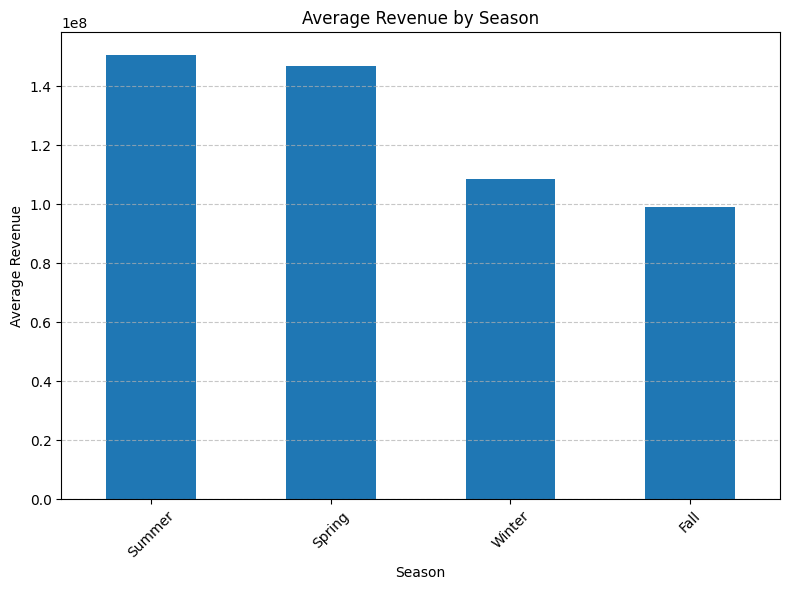

In [927]:

# Group the data by release season and calculate the mean revenue
seasonal_revenue = cleaned_movies_df.groupby('release_season')['revenue'].mean().sort_values(ascending=False)

# Display the average revenue by season
print("Average revenue by season:")
print(seasonal_revenue)

# Plotting the results
plt.figure(figsize=(8, 6))
seasonal_revenue.plot(kind='bar')
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observations:
<br>
This suggests that movies released in Summer and Spring generally perform better in terms of revenue. 

Analyze if these averages are driven by a few blockbusters or consistent seasonal performance.

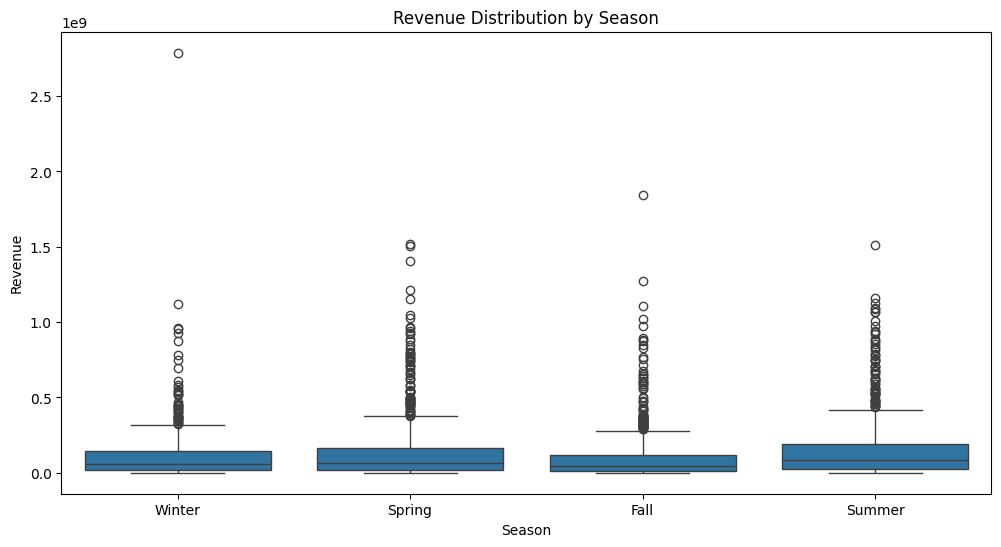

In [928]:
# Set plot size
plt.figure(figsize=(12, 6))

# Create a box plot for revenue by season
sns.boxplot(data=cleaned_movies_df, x='release_season', y='revenue', showfliers=True)
plt.title('Revenue Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')

# Show the plot
plt.show()


The median revenues seem fairly similar across all seasons, indicating that the central tendency does not vary significantly.<br>
Lets remove the outliers and recalculate the average revenue for each season to see how much the averages are affected by blockbusters.


In [929]:
# Remove outliers using the IQR method
Q1 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.25)
Q3 = cleaned_movies_df.groupby('release_season')['revenue'].quantile(0.75)
IQR = Q3 - Q1

def remove_outliers(row):
    q1 = Q1[row['release_season']]
    q3 = Q3[row['release_season']]
    iqr = IQR[row['release_season']]
    return (row['revenue'] >= q1 - 1.5 * iqr) and (row['revenue'] <= q3 + 1.5 * iqr)

filtered_df = cleaned_movies_df[cleaned_movies_df.apply(remove_outliers, axis=1)]

# Recalculate average revenue without outliers
avg_revenue_no_outliers = filtered_df.groupby('release_season')['revenue'].mean()
print(avg_revenue_no_outliers)


release_season
Fall      5.915807e+07
Spring    8.161926e+07
Summer    1.015239e+08
Winter    7.833966e+07
Name: revenue, dtype: float64


In [930]:
# Verify the changes
print(cleaned_movies_df.columns)

Index(['budget', 'id', 'original_title', 'popularity', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'movie_id',
       ...
       'lang_en', 'lang_fr', 'lang_es', 'lang_de', 'lang_it', 'lang_ru',
       'release_year', 'release_month', 'release_dayofweek', 'release_season'],
      dtype='object', length=215)


Overvations: <br>
- Summer: Still leads in average revenue even without outliers, confirming that this season generally performs better, likely due to increased audience availability and the release of major blockbusters.
- Spring and Winter: Show similar average revenue levels, though Spring performs slightly better.
- Fall: Has the lowest average revenue

Lets do One-Hot Encoding, and creat features like `season_summer`, `season_winter` with binary values.

In [931]:
# One-hot encode the 'release_season' column
season_encoded_df = pd.get_dummies(cleaned_movies_df['release_season'], prefix='season')

# Ensure the resulting columns are in 0/1 format
season_encoded_df = season_encoded_df.astype(int)

# Concatenate the encoded columns with the original DataFrame
cleaned_movies_df = pd.concat([cleaned_movies_df, season_encoded_df], axis=1)

# Drop the original 'release_season' column
cleaned_movies_df = cleaned_movies_df.drop(columns=['release_season'], errors='ignore')

# Verify the changes
print(cleaned_movies_df[['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']].head())


   season_Fall  season_Spring  season_Summer  season_Winter
0            0              0              0              1
1            0              1              0              0
2            1              0              0              0
3            0              0              1              0
4            0              1              0              0


In [932]:
# Drop other features related to release date

cleaned_movies_df.drop(columns=['release_date'], inplace=True)

cleaned_movies_df.drop(columns=['release_month'], inplace=True)

cleaned_movies_df.drop(columns=['release_dayofweek'], inplace=True)

# Verify the changes
print(cleaned_movies_df.columns)


Index(['budget', 'id', 'original_title', 'popularity', 'revenue', 'runtime',
       'title', 'vote_average', 'movie_id', 'main_actor_names',
       ...
       'lang_fr', 'lang_es', 'lang_de', 'lang_it', 'lang_ru', 'release_year',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object', length=215)


In [933]:
pd.set_option('display.max_columns', None)  # Display all columns

cleaned_movies_df

budget      id                            original_title  popularity  \
0     237000000   19995                                    Avatar  150.437577   
1     300000000     285  Pirates of the Caribbean: At World's End  139.082615   
2     245000000  206647                                   Spectre  107.376788   
3     250000000   49026                     The Dark Knight Rises  112.312950   
4     260000000   49529                               John Carter   43.926995   
...         ...     ...                                       ...         ...   
4758    4000000  242095                                The Signal   27.662696   
4772      31192   42151                              Down Terrace    1.330379   
4773      27000    2292                                    Clerks   19.748658   
4788      12000     692                            Pink Flamingos    4.553644   
4796       7000   14337                                    Primer   23.307949   

         revenue  runtime                                     title  \
0     2787965087    162.0                                    Avatar   
1      961000000    169.0  Pirates of the Caribbean: At World's End   
2      880674609    148.0                                   Spectre   
3     1084939099    165.0                     The Dark Knight Rises   
4      284139100    132.0                               John Carter   
...          ...      ...                                       ...   
4758      600896     95.0                                The Signal   
4772       10000     89.0                              Down Terrace   
4773     3151130     92.0                                    Clerks   
4788     6000000     93.0                            Pink Flamingos   
4796      424760     77.0                                    Primer   

      vote_average  movie_id  \
0              7.2     19995   
1              6.9       285   
2              6.3    206647   
3              7.6     49026   
4              6.1     49529   
...            ...       ...   
4758           5.8    242095   
4772           6.3     42151   
4773           7.4      2292   
4788           6.2       692   
4796           6.9     14337   

                                                                                                                                                 main_actor_names  \
0       [Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso]   
1         [Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoffrey Rush, Jack Davenport, Kevin McNally, Tom Hollander]   
2             [Daniel Craig, Christoph Waltz, Léa Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie Harris, Dave Bautista, Andrew Scott, Rory Kinnear]   
3     [Christian Bale, Michael Caine, Gary Oldman, Anne Hathaway, Tom Hardy, Marion Cotillard, Joseph Gordon-Levitt, Morgan Freeman, Cillian Murphy, Juno Temple]   
4       [Taylor Kitsch, Lynn Collins, Samantha Morton, Willem Dafoe, Thomas Haden Church, Mark Strong, Ciarán Hinds, Dominic West, James Purefoy, Bryan Cranston]   
...                                                                                                                                                           ...   
4758  [Brenton Thwaites, Olivia Cooke, Beau Knapp, Laurence Fishburne, Robert Longstreet, Lin Shaye, Jeffrey Grover, Patrick Davidson, Roy Kenny, Timothy Holmes]   
4772                            [Robert Hill, Robin Hill, Julia Deakin, David Schaal, Tony Way, Michael Smiley, Kerry Peacock, Mark Kempner, Gareth Tunley, None]   
4773   [Brian O'Halloran, Jeff Anderson, Jason Mewes, Kevin Smith, Lisa Spoonhauer, Marilyn Ghigliotti, Scott Mosier, Walt Flanagan, Scott Schiaffo, David Klein]   
4788            [Divine, David Lochary, Mary Vivian Pearce, Mink Stole, Danny Mills, Edith Massey, Channing Wilroy, Cookie Mueller, Susan Walsh, Lin

### 5.10 Actors

Main actors: let's see the correlation between the choice of the main actors and the key factors we want to predict. Since the actors' names cannot be processed themselves, we can transform them into a star-power indication. We can analyse in how many movies in this dataset those actors have appeared in and transform the number into star-power.

First let's analyse the number of appearances:

In [934]:
import pandas as pd
from collections import Counter

# Step 1: Expand the 'main_actor_names' column into individual rows for analysis
expanded_actors_df = cleaned_movies_df.explode('main_actor_names')

# Step 2: Group by actor and calculate total revenue
actor_revenue_df = (
    expanded_actors_df.groupby('main_actor_names')['revenue']
    .sum()
    .reset_index()
    .rename(columns={'main_actor_names': 'Actor', 'revenue': 'Total_Revenue'})
)

# Step 3: Sort actors by total revenue in descending order
top_30_actors = actor_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(30)

# Step 4: Create one-hot encoded columns for the top 30 actors
top_30_actor_names = top_30_actors['Actor'].tolist()

for actor in top_30_actor_names:
    column_name = f'actor_{actor.replace(" ", "_")}'  # Ensure valid column names
    cleaned_movies_df[column_name] = cleaned_movies_df['main_actor_names'].apply(
        lambda x: 1 if actor in x else 0
    )

# Step 5: Verify the one-hot encoded columns
columns_to_display = ['title', 'main_actor_names'] + [f'actor_{actor.replace(" ", "_")}' for actor in top_30_actor_names]
print("Top 30 actors by revenue and their encoded columns:")
print(cleaned_movies_df[columns_to_display].head())


Top 30 actors by revenue and their encoded columns:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                                                                                                              main_actor_names  \
0    [Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso]   
1      [Johnny Depp, Orlando Bloom, Keira Knightley, Stellan Skarsgård, Chow Yun-fat, Bill Nighy, Geoffrey Rush, Jack Davenport, Kevin McNally, Tom Hollander]   
2          [Daniel Craig, Christoph Waltz, Léa Seydoux, Ralph Fiennes, Monica Bellucci, Ben Whishaw, Naomie Harris, Dave Bautista, Andrew Scott, Rory Kinnear]   
3  [Christian Bal

In [935]:
# Drop redundant columns
columns_to_drop = ['main_actor_names']  # Specify columns to drop
cleaned_movies_df.drop(columns=columns_to_drop, inplace=True)


# Display the updated DataFrame
cleaned_movies_df.head()



budget      id                            original_title  popularity  \
0  237000000   19995                                    Avatar  150.437577   
1  300000000     285  Pirates of the Caribbean: At World's End  139.082615   
2  245000000  206647                                   Spectre  107.376788   
3  250000000   49026                     The Dark Knight Rises  112.312950   
4  260000000   49529                               John Carter   43.926995   

      revenue  runtime                                     title  \
0  2787965087    162.0                                    Avatar   
1   961000000    169.0  Pirates of the Caribbean: At World's End   
2   880674609    148.0                                   Spectre   
3  1084939099    165.0                     The Dark Knight Rises   
4   284139100    132.0                               John Carter   

   vote_average  movie_id              main_actor_genders  \
0           7.2     19995  [2, 1, 1, 2, 1, 2, 2, 1, 2, 2]   
1           6.9       285  [2, 2, 1, 2, 2, 2, 2, 2, 2, 2]   
2           6.3    206647  [2, 2, 1, 2, 1, 2, 1, 2, 2, 2]   
3           7.6     49026  [2, 2, 2, 1, 2, 1, 2, 2, 2, 1]   
4           6.1     49529  [2, 1, 1, 2, 2, 2, 2, 2, 2, 2]   

             directors  \
0      [James Cameron]   
1     [Gore Verbinski]   
2         [Sam Mendes]   
3  [Christopher Nolan]   
4     [Andrew Stanton]   

                                                   writers  \
0                                          [James Cameron]   
1                              [Ted Elliott, Terry Rossio]   
2  [John Logan, Robert Wade, Neal Purvis, Jez Butterworth]   
3                      [Christopher Nolan, Jonathan Nolan]   
4           [Andrew Stanton, Michael Chabon, Mark Andrews]   

                                                               producers  \
0                                            [James Cameron, Jon Landau]   
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]   
2                                  [Barbara Broccoli, Michael G. Wilson]   
3                        [Charles Roven, Christopher Nolan, Emma Thomas]   
4                            [Colin Wilson, Jim Morris, Lindsey Collins]   

   crew_size  vote_count  Executive Producer_Stan Lee  \
0        153    9.375940                            0   
1         32    8.412055                            0   
2        155    8.404472                            0   
3        217    9.116799                            0   
4        132    7.661527                            0   

   Executive Producer_Steven Spielberg  Executive Producer_Bruce Berman  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Executive Producer_Thomas Tull  Executive Producer_John Lasseter  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               1                                 0   
4                               0                                 1   

   Executive Producer_Bob Weinstein  Executive Producer_Harvey Weinstein  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   Executive Producer_Louis D'Esposito  Executive Producer_Alan Fine  \
0                       

### 5.11 Directors, producers and writers

Since director, writer and the producers' popularity and skill could be measured by their experience we are going to use the same kind of rating for them and add it to the star_power as well.

In [936]:
import pandas as pd

def hot_encode_top_roles_by_revenue(df, role_column, revenue_column, top_n=20, prefix='role'):
    """
    Function to identify the top contributors (writers, producers, directors) by revenue
    and create one-hot encoded columns for them.
    Args:
        df (pd.DataFrame): DataFrame containing roles and revenue.
        role_column (str): Column with list of contributors (writers, producers, directors).
        revenue_column (str): Column with revenue values.
        top_n (int): Number of top contributors to encode.
        prefix (str): Prefix for the generated column names.

    Returns:
        pd.DataFrame: Updated DataFrame with one-hot encoded columns.
        list: List of top contributors by revenue.
    """
    # Expand the role column into individual rows
    expanded_df = df.explode(role_column)

    # Group by role and calculate total revenue
    role_revenue_df = (
        expanded_df.groupby(role_column)[revenue_column]
        .sum()
        .reset_index()
        .rename(columns={role_column: 'Name', revenue_column: 'Total_Revenue'})
    )

    # Sort contributors by total revenue in descending order
    top_revenue_roles = role_revenue_df.sort_values(by='Total_Revenue', ascending=False).head(top_n)['Name'].tolist()

    # Create one-hot encoded columns for the top contributors
    for role in top_revenue_roles:
        column_name = f'{prefix}_{role.replace(" ", "_")}'  # Ensure valid column names
        df[column_name] = df[role_column].apply(lambda x: 1 if role in x else 0)

    return df, top_revenue_roles


# Apply the function to writers, producers, and directors
cleaned_movies_df, top_writers = hot_encode_top_roles_by_revenue(
    cleaned_movies_df, role_column='writers', revenue_column='revenue', top_n=20, prefix='writer'
)

cleaned_movies_df, top_producers = hot_encode_top_roles_by_revenue(
    cleaned_movies_df, role_column='producers', revenue_column='revenue', top_n=20, prefix='producer'
)

cleaned_movies_df, top_directors = hot_encode_top_roles_by_revenue(
    cleaned_movies_df, role_column='directors', revenue_column='revenue', top_n=20, prefix='director'
)

# Verify the new columns for writers, producers, and directors
columns_to_display = ['title', 'writers', 'producers', 'directors'] + \
                     [f'writer_{writer.replace(" ", "_")}' for writer in top_writers] + \
                     [f'producer_{producer.replace(" ", "_")}' for producer in top_producers] + \
                     [f'director_{director.replace(" ", "_")}' for director in top_directors]

print("Movies with top contributors and their one-hot encoded columns:")
print(cleaned_movies_df[columns_to_display].head())


Movies with top contributors and their one-hot encoded columns:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                   writers  \
0                                          [James Cameron]   
1                              [Ted Elliott, Terry Rossio]   
2  [John Logan, Robert Wade, Neal Purvis, Jez Butterworth]   
3                      [Christopher Nolan, Jonathan Nolan]   
4           [Andrew Stanton, Michael Chabon, Mark Andrews]   

                                                               producers  \
0                                            [James Cameron, Jon Landau]   
1  [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]   
2                                  [Barbara Broccoli

In [937]:
cleaned_movies_df = cleaned_movies_df.drop(columns=['producers','directors','writers'])

### 5.12 Crew size

What correlation does the crew size have with the rest of the dataset? Let's check it for budget and genres.

In [938]:
# Step 1: Identify the genre columns (one-hot encoded)
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 
    'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 
    'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War'
]

# Step 2: Calculate correlations
correlation_matrix = cleaned_movies_df[['budget', 'crew_size'] + genre_columns].corr()

# Step 3: Extract correlations
# a) Correlation between budget and crew size
budget_crewsize_correlation = correlation_matrix.loc['budget', 'crew_size']

# b) Correlation between crew size and genres
crewsize_genre_correlation = correlation_matrix.loc['crew_size', genre_columns]

# Step 4: Display results
print("Correlation Between Budget and Crew Size:")
print(budget_crewsize_correlation)

print("\nCorrelation Between Crew Size and Genres:")
print(crewsize_genre_correlation.sort_values(ascending=False))


Correlation Between Budget and Crew Size:
0.3828237089769994

Correlation Between Crew Size and Genres:
Action             0.194976
Science Fiction    0.157905
Thriller           0.141023
Adventure          0.138284
Fantasy            0.067807
War                0.064462
Mystery            0.051105
Crime              0.032289
Animation          0.029764
History            0.014557
Horror             0.011529
Family            -0.026703
Foreign           -0.028346
Documentary       -0.070546
Music             -0.078765
Drama             -0.081086
Romance           -0.133483
Comedy            -0.173688
Name: crew_size, dtype: float64


The crew size has a relatively high correlation with the budget, however, it doesn't seem like a very defining factor for the genres.

We also have information about the main actors' genders. Since we have only three main actors we can divide this information into a binary column indicating whether most of them are male or female. 

In [939]:
# Function to calculate the ratio of female to male members in the cast
def gender_ratio(gender_list):
    if isinstance(gender_list, list):  # Check if the value is a list
        male_count = gender_list.count(2)  # Count occurrences of '2' (male)
        female_count = gender_list.count(1)  # Count occurrences of '1' (female)
        total_count = male_count + female_count
        if total_count > 0:  # Avoid division by zero
            return female_count / total_count, male_count / total_count  # Return ratios
    return np.nan, np.nan  # Handle cases where the value is not a list

# Apply the function to calculate the gender ratios
cleaned_movies_df[['female_ratio', 'male_ratio']] = cleaned_movies_df['main_actor_genders'].apply(
    lambda x: pd.Series(gender_ratio(x))
)

# Verify the new columns
print(cleaned_movies_df[['main_actor_genders', 'female_ratio', 'male_ratio']].head())


               main_actor_genders  female_ratio  male_ratio
0  [2, 1, 1, 2, 1, 2, 2, 1, 2, 2]           0.4         0.6
1  [2, 2, 1, 2, 2, 2, 2, 2, 2, 2]           0.1         0.9
2  [2, 2, 1, 2, 1, 2, 1, 2, 2, 2]           0.3         0.7
3  [2, 2, 2, 1, 2, 1, 2, 2, 2, 1]           0.3         0.7
4  [2, 1, 1, 2, 2, 2, 2, 2, 2, 2]           0.2         0.8


In [940]:
# Drop the 'main_actor_genders' column
cleaned_movies_df = cleaned_movies_df.drop(columns=['main_actor_genders'], errors='ignore')

# Verify the column is dropped
print(cleaned_movies_df.head())


      budget      id                            original_title  popularity  \
0  237000000   19995                                    Avatar  150.437577   
1  300000000     285  Pirates of the Caribbean: At World's End  139.082615   
2  245000000  206647                                   Spectre  107.376788   
3  250000000   49026                     The Dark Knight Rises  112.312950   
4  260000000   49529                               John Carter   43.926995   

      revenue  runtime                                     title  \
0  2787965087    162.0                                    Avatar   
1   961000000    169.0  Pirates of the Caribbean: At World's End   
2   880674609    148.0                                   Spectre   
3  1084939099    165.0                     The Dark Knight Rises   
4   284139100    132.0                               John Carter   

   vote_average  movie_id  crew_size  vote_count  Executive Producer_Stan Lee  \
0           7.2     19995        153    9

### 5.13 Cast genders

Let's see if the gender of the majority of the cast impacts the revenue.

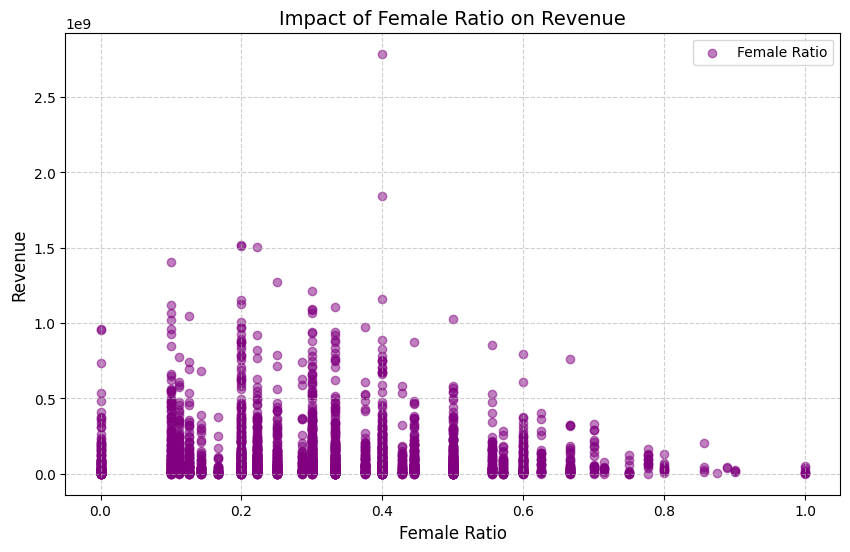

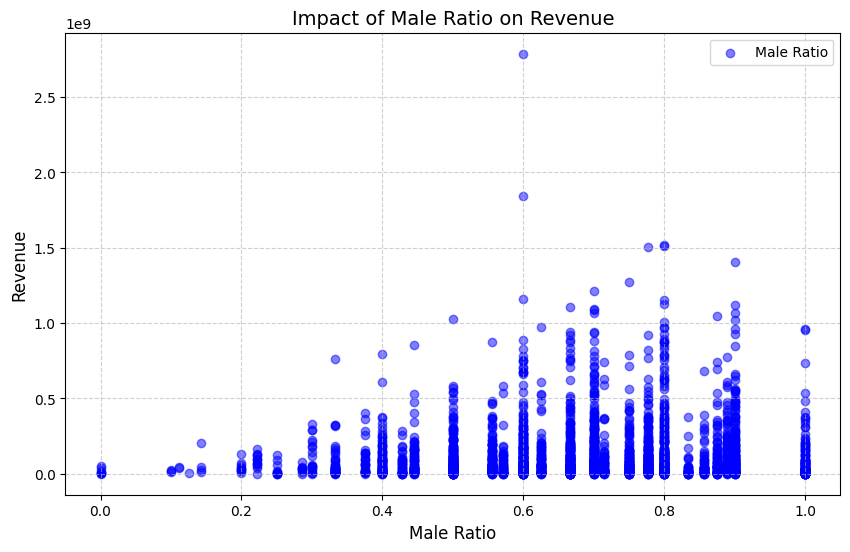

In [941]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between female_ratio and revenue
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_movies_df['female_ratio'], cleaned_movies_df['revenue'], alpha=0.5, label='Female Ratio', color='purple')
plt.title('Impact of Female Ratio on Revenue', fontsize=14)
plt.xlabel('Female Ratio', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Scatter plot to visualize the relationship between male_ratio and revenue
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_movies_df['male_ratio'], cleaned_movies_df['revenue'], alpha=0.5, label='Male Ratio', color='blue')
plt.title('Impact of Male Ratio on Revenue', fontsize=14)
plt.xlabel('Male Ratio', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


Observations: it seems like a better revenue might be caused by smaller ratio of the female cast to the male.These trends might also depend on the genre of the movie and who is casted in the main roles. 

Dropping redundant columns

We have kept columns like id or title so far for clarity of the analysis, however, before applying the models we want to drop them. We need to drop the target column as well.

In [942]:
# List of columns to drop
columns_to_drop = [
    'id' , 'movie_id', 'title', 'original_title'
]

# Drop the columns
cleaned_movies_df = cleaned_movies_df.drop(columns=columns_to_drop, errors='ignore')

cleaned_movies_df.head()


budget  popularity     revenue  runtime  vote_average  crew_size  \
0  237000000  150.437577  2787965087    162.0           7.2        153   
1  300000000  139.082615   961000000    169.0           6.9         32   
2  245000000  107.376788   880674609    148.0           6.3        155   
3  250000000  112.312950  1084939099    165.0           7.6        217   
4  260000000   43.926995   284139100    132.0           6.1        132   

   vote_count  Executive Producer_Stan Lee  \
0    9.375940                            0   
1    8.412055                            0   
2    8.404472                            0   
3    9.116799                            0   
4    7.661527                            0   

   Executive Producer_Steven Spielberg  Executive Producer_Bruce Berman  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Executive Producer_Thomas Tull  Executive Producer_John Lasseter  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               1                                 0   
4                               0                                 1   

   Executive Producer_Bob Weinstein  Executive Producer_Harvey Weinstein  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   Executive Producer_Louis D'Esposito  Executive Producer_Alan Fine  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   Executive Producer_Chad Oman  Art Direction_David F. Klassen  \
0                             0                               0   
1                             1                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   Art Direction_Ravi Bansal  Art Direction_Andrew Ackland-Snow  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Art Direction_Phil Harvey  Art Direction_William Ladd Skinner  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          1                                   0   

   Art Direction_Keith P. Cunningham  Art Direction_William James Teegarden  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                            

Let's look into the NaN values

In [943]:
# Check for NaN or null values in all columns and their counts
nan_null_counts = cleaned_movies_df.isnull().sum()

# Filter columns with NaN or null values
nan_null_columns = nan_null_counts[nan_null_counts > 0].reset_index()
nan_null_columns.columns = ['Column', 'NaN/Null Count']

# Display only columns with NaN or null values
if not nan_null_columns.empty:
    print("Columns with NaN or Null Values and Their Counts:")
    print(nan_null_columns)
else:
    print("No columns with NaN or Null values found.")


Columns with NaN or Null Values and Their Counts:
         Column  NaN/Null Count
0  female_ratio              10
1    male_ratio              10


Let's exchange these values with the average ratios.

In [944]:
# Calculate the mean of the existing ratios
female_mean = cleaned_movies_df['female_ratio'].mean()
male_mean = cleaned_movies_df['male_ratio'].mean()

# Ensure the ratios balance to 1 for replacement
total_mean = female_mean + male_mean
female_adjusted_mean = female_mean / total_mean
male_adjusted_mean = male_mean / total_mean

# Replace NaN values in the columns
cleaned_movies_df['female_ratio'] = cleaned_movies_df['female_ratio'].fillna(female_adjusted_mean)
cleaned_movies_df['male_ratio'] = cleaned_movies_df['male_ratio'].fillna(male_adjusted_mean)

# Verify the changes
print("NaN values replaced with balanced means in 'female_ratio' and 'male_ratio' columns.")
print(cleaned_movies_df[['female_ratio', 'male_ratio']].isnull().sum())


NaN values replaced with balanced means in 'female_ratio' and 'male_ratio' columns.
female_ratio    0
male_ratio      0
dtype: int64


In [945]:
cleaned_movies_df.head()

budget  popularity     revenue  runtime  vote_average  crew_size  \
0  237000000  150.437577  2787965087    162.0           7.2        153   
1  300000000  139.082615   961000000    169.0           6.9         32   
2  245000000  107.376788   880674609    148.0           6.3        155   
3  250000000  112.312950  1084939099    165.0           7.6        217   
4  260000000   43.926995   284139100    132.0           6.1        132   

   vote_count  Executive Producer_Stan Lee  \
0    9.375940                            0   
1    8.412055                            0   
2    8.404472                            0   
3    9.116799                            0   
4    7.661527                            0   

   Executive Producer_Steven Spielberg  Executive Producer_Bruce Berman  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   

   Executive Producer_Thomas Tull  Executive Producer_John Lasseter  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               1                                 0   
4                               0                                 1   

   Executive Producer_Bob Weinstein  Executive Producer_Harvey Weinstein  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   Executive Producer_Louis D'Esposito  Executive Producer_Alan Fine  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   Executive Producer_Chad Oman  Art Direction_David F. Klassen  \
0                             0                               0   
1                             1                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   Art Direction_Ravi Bansal  Art Direction_Andrew Ackland-Snow  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Art Direction_Phil Harvey  Art Direction_William Ladd Skinner  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          1                                   0   

   Art Direction_Keith P. Cunningham  Art Direction_William James Teegarden  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                            

## 6 Data splitting 

In [946]:
# Import library
from sklearn.model_selection import train_test_split

# 1. Separate features and target variable
target_column = 'revenue'  # 'revenue' is our target
X = cleaned_movies_df.drop(columns=[target_column])
y = cleaned_movies_df[target_column]

# 2. Split the data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42  # 70% train, 30% temp
)

# 3. Split the temp data equally into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42  # 50% of 30% = 15% each
)

# 4. Merge `y` back for easier manipulation
train_df = X_train.copy()
train_df[target_column] = y_train

val_df = X_val.copy()
val_df[target_column] = y_val

test_df = X_test.copy()
test_df[target_column] = y_test

# Verify the split
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")


Training data shape: (2160, 298)
Validation data shape: (463, 298)
Test data shape: (464, 298)


## 7 Models

We are going to use random forest model and grandient boosting model since our data is highly skewed due to some extremely successful movies with big budgets and revenue which we wouldn't like to scale down. The outliers are common and relevant in these cases and tree based models should be able to handle that. They should also do better with a large number of columns which we wanted to keep since they hold a lot of relevant data.


### 7.1 Random forest

In [947]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target for training, validation, and testing
X_train = train_df.drop(columns=['revenue'])
y_train = train_df['revenue']

X_val = val_df.drop(columns=['revenue'])
y_val = val_df['revenue']

X_test = test_df.drop(columns=['revenue'])
y_test = test_df['revenue']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree
    random_state=42,   # For reproducibility
    n_jobs=-1          # Use all available cores
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Test the model on the test set
y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Random Forest Validation Metrics:")
print(f"Validation Mean Squared Error (MSE): {val_mse}")
print(f"Validation R^2 Score: {val_r2}")

print("\nRandom Forest Test Metrics:")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R^2 Score: {test_r2}")


Random Forest Validation Metrics:
Validation Mean Squared Error (MSE): 1.0222803214222342e+16
Validation R^2 Score: 0.729339524791982

Random Forest Test Metrics:
Test Mean Squared Error (MSE): 1.7069732836109802e+16
Test R^2 Score: 0.705889246085079


#### Observations

##### **Random Forest Validation Metrics**
- **Mean Squared Error (MSE):**  
  - A validation MSE of `1.0222803214222342e+16` suggests that while the model is performing reasonably on the validation set, there is still a significant difference between predicted and actual revenue values.  
  - This may indicate the presence of outliers (e.g., blockbuster movies with extremely high revenue).

- **R² Score:**  
  - The validation R² score of `0.729` indicates that **72.9% of the variance** in the revenue is explained by the model on the validation set.  
  - While this is a reasonably good score, there’s room for improvement, possibly through feature engineering or hyperparameter tuning.

---

##### **Random Forest Test Metrics**
- **Mean Squared Error (MSE):**  
  - The test MSE of `1.7069732836109802e+16` is higher than the validation MSE, which may indicate some degree of **overfitting** or that the test set contains harder-to-predict movies (e.g., extremely high or low revenue).

- **R² Score:**  
  - The test R² score of `0.705` is slightly lower than the validation R², suggesting the model generalizes reasonably well to unseen data but could benefit from further optimization.  
  - It also reflects that the model captures **most of the revenue variance** but struggles with certain data points.


### 7.2 Gradient Boosting

In [948]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target for training, validation, and testing
X_train = train_df.drop(columns=['revenue'])
y_train = train_df['revenue']

X_val = val_df.drop(columns=['revenue'])
y_val = val_df['revenue']

X_test = test_df.drop(columns=['revenue'])
y_test = test_df['revenue']

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Learning rate for each stage
    max_depth=3,             # Maximum depth of the individual trees
    random_state=42          # For reproducibility
)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = gb_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Test the model on the test set
y_test_pred = gb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Gradient Boosting Validation Metrics:")
print(f"Validation Mean Squared Error (MSE): {val_mse}")
print(f"Validation R^2 Score: {val_r2}")

print("\nGradient Boosting Test Metrics:")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R^2 Score: {test_r2}")


Gradient Boosting Validation Metrics:
Validation Mean Squared Error (MSE): 9553854936067944.0
Validation R^2 Score: 0.7470507000010442

Gradient Boosting Test Metrics:
Test Mean Squared Error (MSE): 1.4343531285224484e+16
Test R^2 Score: 0.7528615801662982


#### Observations

##### **Gradient Boosting Validation Metrics**
- **Mean Squared Error (MSE):**  
  - The validation MSE of `9.553854936067944e+15` indicates a reasonably good performance on the validation set, with the model capturing the target variable effectively.  

- **R² Score:**  
  - The validation R² score of `0.747` suggests that **74.7% of the variance** in the revenue is explained by the model on the validation set.  
  - This is a strong score, indicating the model fits the training data well.
  

---

##### **Gradient Boosting Test Metrics**
- **Mean Squared Error (MSE):**  
  - The test MSE of `1.4343531285224484e+16` is slightly higher than the validation MSE, which might indicate some **overfitting** or that the test set contains harder-to-predict data points.

- **R² Score:**  
  - The test R² score of `0.753` shows that the model generalizes well to unseen data, explaining **75.3% of the variance** in the revenue.  
  - This suggests the model is well-suited for this task and performs slightly better than Random Forest in capturing the patterns in revenue.


## 8 Hyperparameter tuning

We are going to try to tune the Gradient Boosting. Let's see what parameters will be the best by using Grid Search

In [949]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Shrinkage rate for each tree
    'max_depth': [3, 5, 7],               # Maximum depth of individual trees
    'subsample': [0.8, 1.0],              # Fraction of samples for training each tree
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE for scoring
    cv=5,                              # 5-fold cross-validation
    n_jobs=-1,                         # Use all cores
    verbose=1                          # Display progress
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE back to positive

print("Best Parameters:", best_params)
print("Best Validation MSE:", best_score)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Validation MSE: 7253322133364237.0


Let's train the model again 

In [950]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the final Gradient Boosting model with the best hyperparameters
final_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=1.0,
    random_state=42
)

# Fit the model on the training data
final_gb_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = final_gb_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Test the model on the test set
y_test_pred = final_gb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the final model metrics
print("*** Final Gradient Boosting Validation Metrics ***")
print(f"Validation Mean Squared Error (MSE): {val_mse}")
print(f"Validation R² Score: {val_r2}")

print("\n*** Final Gradient Boosting Test Metrics ***")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R² Score: {test_r2}")


*** Final Gradient Boosting Validation Metrics ***
Validation Mean Squared Error (MSE): 9278045196300586.0
Validation R² Score: 0.7543530801474776

*** Final Gradient Boosting Test Metrics ***
Test Mean Squared Error (MSE): 1.5459289179566708e+16
Test R² Score: 0.7336371202030277


### Gradient Boosting Results Overview

#### **Before Hyperparameter Tuning**
- **Validation Metrics:**
  - **MSE:** `9.553854936067944e+15`
  - **R²:** `0.747`
- **Test Metrics:**
  - **MSE:** `1.4343531285224484e+16`
  - **R²:** `0.753`

#### **After Hyperparameter Tuning**
- **Validation Metrics:**
  - **MSE:** `9.278045196300586e+15`  
  - **R²:** `0.754`
- **Test Metrics:**
  - **MSE:** `1.5459289179566708e+16`
  - **R²:** `0.734`

---

#### **Key Observations**
1. **Validation Performance:**
   - **MSE improved** slightly after hyperparameter tuning, reducing errors on the validation set.
   - **R² increased**, capturing more variance in revenue predictions.

2. **Test Performance:**
   - **MSE increased**, indicating the model may now slightly overfit to the training/validation set.
   - **R² decreased**, suggesting a small drop in generalization to unseen data.

3. **Overall:**
   - Tuning helped refine the model's performance on the validation set.
   - Further improvements may require addressing the slight overfitting to validation data.


## Link to our presentation

[Movie success prediction](https://youtu.be/gg3DHdCDdi8)
